Fonte: UCI Machine Learning Repository — Bank Marketing  
Licença: não informada pela fonte oficial. Uso apenas para fins acadêmicos/pessoais.  


In [25]:
pip install ucimlrepo

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [27]:

# 1. IMPORTAÇÃO E CARREGAMENTO

from ucimlrepo import fetch_ucirepo
import pandas as pd

# Carregar dataset Bank Marketing
bank_marketing = fetch_ucirepo(id=222)

# Separar features (X) e alvo (y)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# Criar dataframe unificado
df = pd.concat([X, y], axis=1)

# 2. METADADOS E ESTRUTURA

print("=== METADATA ===")
print(bank_marketing.metadata)

print("\n=== VARIABLES INFO ===")
print(bank_marketing.variables)

print("\n=== DIMENSÕES ===")
print("X:", X.shape)
print("y:", y.shape)
print("df:", df.shape)

# 3. PRIMEIRA INSPEÇÃO

print("\n=== HEAD DO DATAFRAME ===")
display(df.head())

print("\n=== INFO DO DATAFRAME ===")
df.info()

print("\n=== DESCRIBE ===")
display(df.describe(include='all'))

# 4. ANÁLISE DE VALORES AUSENTES

print("\n=== VALORES AUSENTES POR COLUNA ===")
display(df.isnull().sum())

print("\nTotal de valores ausentes:", df.isnull().sum().sum())

# 5. TIPOS DE DADOS

print("\n=== TIPOS DE DADOS ===")
print(df.dtypes)


=== METADATA ===
{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no



=== INFO DO DATAFRAME ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB

=== DESCRIBE ===


,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,44923,45211,43354,45211,45211.000000,45211,45211,32191,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,8252,45211
unique,NaN,11,3,3,2,NaN,2,2,2,NaN,12,NaN,NaN,NaN,NaN,3,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,failure,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,4901,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN



=== VALORES AUSENTES POR COLUNA ===


,0
age,0
job,288
marital,0
education,1857
default,0
balance,0
housing,0
loan,0
contact,13020
day_of_week,0



Total de valores ausentes: 52124

=== TIPOS DE DADOS ===
age             int64
job            object
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
day_of_week     int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object


In [ ]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN


In [ ]:
y

,y
0,no
1,no
2,no
3,no
4,no
...,...
45206,yes
45207,yes
45208,yes
45209,no


Concatenado X e Y para realiza uma analize completa dos dados. em seguida verificado o estatus dos dados com isso foi possivel identificar que se trata de de uma tabela de 45211 linhas e 17 colunas

In [6]:
# Juntar X e y para análise completa
df = pd.concat([X, y], axis=1)

# Garantir que a coluna alvo se chame 'y'
df.rename(columns={df.columns[-1]: 'y'}, inplace=True)

print("Dimensões do dataset completo:")
print(f"Shape: {df.shape}")

# Primeiras linhas
df.head()


=== DIMENSÕES DO DATAFRAME ===
Linhas: 45211
Colunas: 17

=== HEAD ===


,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no



=== TIPOS DE DADOS ===
age             int64
job            object
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
day_of_week     int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

=== DISTRIBUIÇÃO DO TARGET ===


,count
y,
no,39922
yes,5289


,proportion
y,
no,0.883015
yes,0.116985



=== VALORES AUSENTES ===


,0
age,0
job,288
marital,0
education,1857
default,0
balance,0
housing,0
loan,0
contact,13020
day_of_week,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# GRÁFICO DISTRIBUIÇÃO DA VARIÁVEL ALVO


=== CONTAGEM DA VARIÁVEL ALVO (y) ===


,count
y,
no,39922
yes,5289



=== PROPORÇÃO DA VARIÁVEL ALVO (%) ===


,proportion
y,
no,88.3
yes,11.7


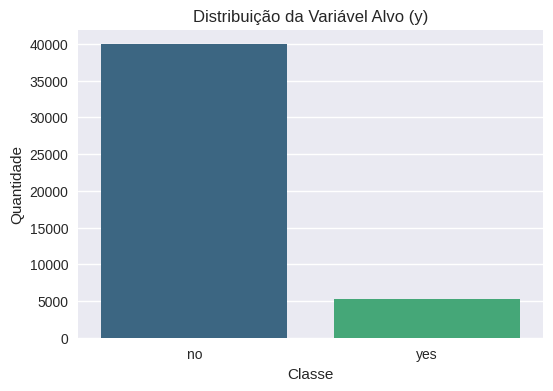


=== TABELA DE VALORES AUSENTES ===


,Valores Faltantes,Percentual (%)
age,0,0.00
job,288,0.64
marital,0,0.00
education,1857,4.11
default,0,0.00
balance,0,0.00
housing,0,0.00
loan,0,0.00
contact,13020,28.80
day_of_week,0,0.00



=== COLUNAS COM VALORES FALTANTES ===


,Valores Faltantes,Percentual (%)
job,288,0.64
education,1857,4.11
contact,13020,28.80
poutcome,36959,81.75


In [8]:


print("=== CONTAGEM DA VARIÁVEL ALVO (y) ===")
display(df['y'].value_counts())

print("\n=== PROPORÇÃO DA VARIÁVEL ALVO (%) ===")
display(df['y'].value_counts(normalize=True).apply(lambda x: round(x*100, 2)))

# Gráfico da distribuição
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='y', palette='viridis')
plt.title('Distribuição da Variável Alvo (y)')
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.show()

# VALORES AUSENTES

missing_info = df.isna().sum().to_frame(name='Valores Faltantes')
missing_info['Percentual (%)'] = round((df.isna().sum() / len(df)) * 100, 2)

print("\n=== TABELA DE VALORES AUSENTES ===")
display(missing_info)

print("\n=== COLUNAS COM VALORES FALTANTES ===")
display(missing_info[missing_info['Valores Faltantes'] > 0])


### Interpretação: Distribuição da Variável Alvo (y)

A variável-alvo apresenta forte desbalanceamento: **88,3% dos clientes não aderiram ("no")** e apenas **11,7% aderiram ("yes")** à campanha.  
Esse padrão, reforçado pelo gráfico de barras, indica que a classe positiva é minoritária. Como consequência:

- será necessário usar métricas adequadas, como *precision*, *recall*, *F1* e *AUC*;
- modelos que assumem classes equilibradas podem ter desempenho enganoso;
- técnicas de balanceamento (oversampling, undersampling ou pesos ajustados) podem melhorar o desempenho dos classificadores.

Esse desbalanceamento é característico do dataset Bank Marketing e deve ser levado em consideração na modelagem.

---

### Interpretação: Tabela de Valores Ausentes

A análise de valores faltantes mostra que quase todas as ausências estão concentradas em quatro variáveis:

- **poutcome** — 81,75% de valores ausentes  
- **contact** — 28,80%  
- **education** — 4,11%  
- **job** — 0,64%  

As demais colunas não apresentam ausências.

Como essas variáveis são categóricas, os valores ausentes provavelmente representam informações não registradas (ex.: contato não realizado ou resultado desconhecido). Isso deve ser tratado, normalmente substituindo valores ausentes por uma categoria como **"unknown"**, procedimento comum neste dataset.

A ausência massiva em *poutcome* sugere que essa variável pode ter pouco impacto preditivo ou exigir tratamento especial.

No conjunto, os dados estão completos para variáveis numéricas, enquanto as variáveis categóricas com valores faltantes exigem padronização antes da modelagem.

---


# TRATAMENTO DE VARIÁVEIS CATEGÓRICAS E NUMÉRICAS

In [10]:


# Converter variáveis temporais para categóricas
df['day_of_week'] = df['day_of_week'].astype('category')
df['month'] = df['month'].astype('category')

# Converter variável alvo para categoria
df['y'] = df['y'].astype('category')

# Separação das variáveis por tipo
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.drop('y')
numerical_cols = df.select_dtypes(include=[np.number]).columns

print("=== VARIÁVEIS CATEGÓRICAS (excluindo y) ===")
print(categorical_cols.tolist())
print(f"Total: {len(categorical_cols)}")

print("\n=== VARIÁVEIS NUMÉRICAS ===")
print(numerical_cols.tolist())from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_recall_curve, average_precision_score

# Configurações de estilo para os gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

#A. Naive Bayes
nb_model = GaussianNB()
…print("ANÁLISE DETALHADA DAS MÉTRICAS")

plt.tight_layout()
plt.show()
print(f"Total: {len(numerical_cols)}")

print("\n=== VARIÁVEL ALVO ===")
print('y')

print("\n=== TIPOS ATUALIZADOS ===")
print(df.dtypes)


=== VARIÁVEIS CATEGÓRICAS (excluindo y) ===
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day_of_week', 'month', 'poutcome']
Total: 10

=== VARIÁVEIS NUMÉRICAS ===
['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
Total: 6

=== VARIÁVEL ALVO ===
y

=== TIPOS ATUALIZADOS ===
age               int64
job              object
marital          object
education        object
default          object
balance           int64
housing          object
loan             object
contact          object
day_of_week    category
month          category
duration          int64
campaign          int64
pdays             int64
previous          int64
poutcome         object
y              category
dtype: object


# TRATAMENTO DE DADOS FALTANTES

In [16]:

print("=== TRATAMENTO DE DADOS FALTANTES ===\n")

# --- 1. Tratar variáveis categóricas ---
categorical_with_nan = df[categorical_cols].isnull().sum()
categorical_with_nan = categorical_with_nan[categorical_with_nan > 0].index

for col in categorical_with_nan:
    mode_val = df[col].mode()[0]
    df[col] = df[col].fillna(mode_val)
    print(f"[CATEGÓRICA] Coluna '{col}' preenchida com a moda: '{mode_val}'")

# --- 2. Tratar variáveis numéricas ---
numerical_with_nan = df[numerical_cols].isnull().sum()
numerical_with_nan = numerical_with_nan[numerical_with_nan > 0].index

for col in numerical_with_nan:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)
    print(f"[NUMÉRICA] Coluna '{col}' preenchida com a mediana: {median_val}")

# --- 3. Verificação final ---
print("\n=== VERIFICAÇÃO APÓS TRATAMENTO ===")
total_missing = df.isnull().sum().sum()
print(f"Total de valores faltantes restantes: {total_missing}")


=== TRATAMENTO DE DADOS FALTANTES ===


=== VERIFICAÇÃO APÓS TRATAMENTO ===
Total de valores faltantes restantes: 0


# DISTRIBUIÇÃO DA VARIÁVEL ALVO (y)

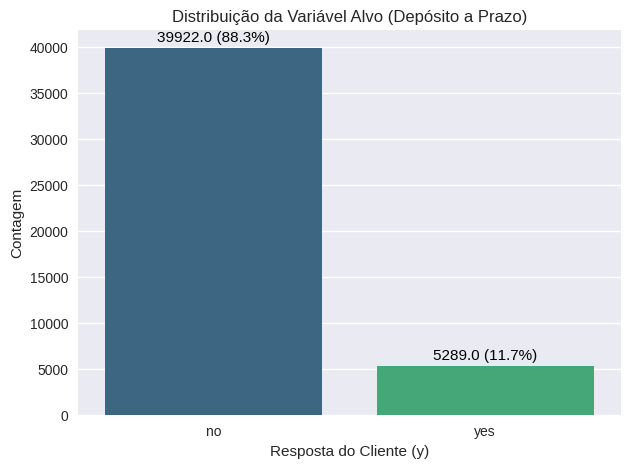

=== DISTRIBUIÇÃO NUMÉRICA DA VARIÁVEL ALVO ===


,count
y,
no,39922
yes,5289


,count
y,
no,88.30152
yes,11.69848



Classe majoritária: no - 39922 (88.3%)
Classe minoritária: yes - 5289 (11.7%)


In [17]:



plt.figure(figsize=(7, 5))
ax = sns.countplot(data=df, x='y', palette='viridis')

# Anotar valores e porcentagens em cada barra
total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = count / total * 100
    ax.annotate(f'{count} ({percentage:.1f}%)',
                (p.get_x() + p.get_width()/2., count),
                ha='center', va='center', fontsize=11, color='black',
                xytext=(0, 8), textcoords='offset points')

plt.title('Distribuição da Variável Alvo (Depósito a Prazo)')
plt.xlabel('Resposta do Cliente (y)')
plt.ylabel('Contagem')
plt.show()

# Estatísticas da variável alvo

target_counts = df['y'].value_counts()

print("=== DISTRIBUIÇÃO NUMÉRICA DA VARIÁVEL ALVO ===")
display(target_counts)
display(target_counts / len(df) * 100)

print(f"\nClasse majoritária: {target_counts.index[0]} - {target_counts.iloc[0]} "
      f"({target_counts.iloc[0]/len(df)*100:.1f}%)")

print(f"Classe minoritária: {target_counts.index[1]} - {target_counts.iloc[1]} "
      f"({target_counts.iloc[1]/len(df)*100:.1f}%)")


### Interpretação: Distribuição da Variável Alvo (y)

A distribuição da variável-alvo mostra um forte desbalanceamento:  
- **"no" = 39.922 clientes (88,3%)**  
- **"yes" = 5.289 clientes (11,7%)**

O gráfico reforça que a grande maioria dos clientes **não aderiu** ao depósito a prazo.  
Esse cenário é comum no dataset Bank Marketing e tem implicações importantes:

- Os modelos podem tender a prever sempre a classe majoritária.  
- Métricas como *accuracy* tornam-se pouco informativas.  
- É necessário avaliar *precision*, *recall*, *F1-score* e *AUC*.  
- Técnicas de balanceamento (SMOTE, undersampling, pesos ajustados) podem ser necessárias.

Em resumo, a variável-alvo é altamente desbalanceada, e isso deve ser considerado durante a modelagem e avaliação dos classificadores.


---

# Distribuição e Detecção de Outliers nas Variáveis Numéricas

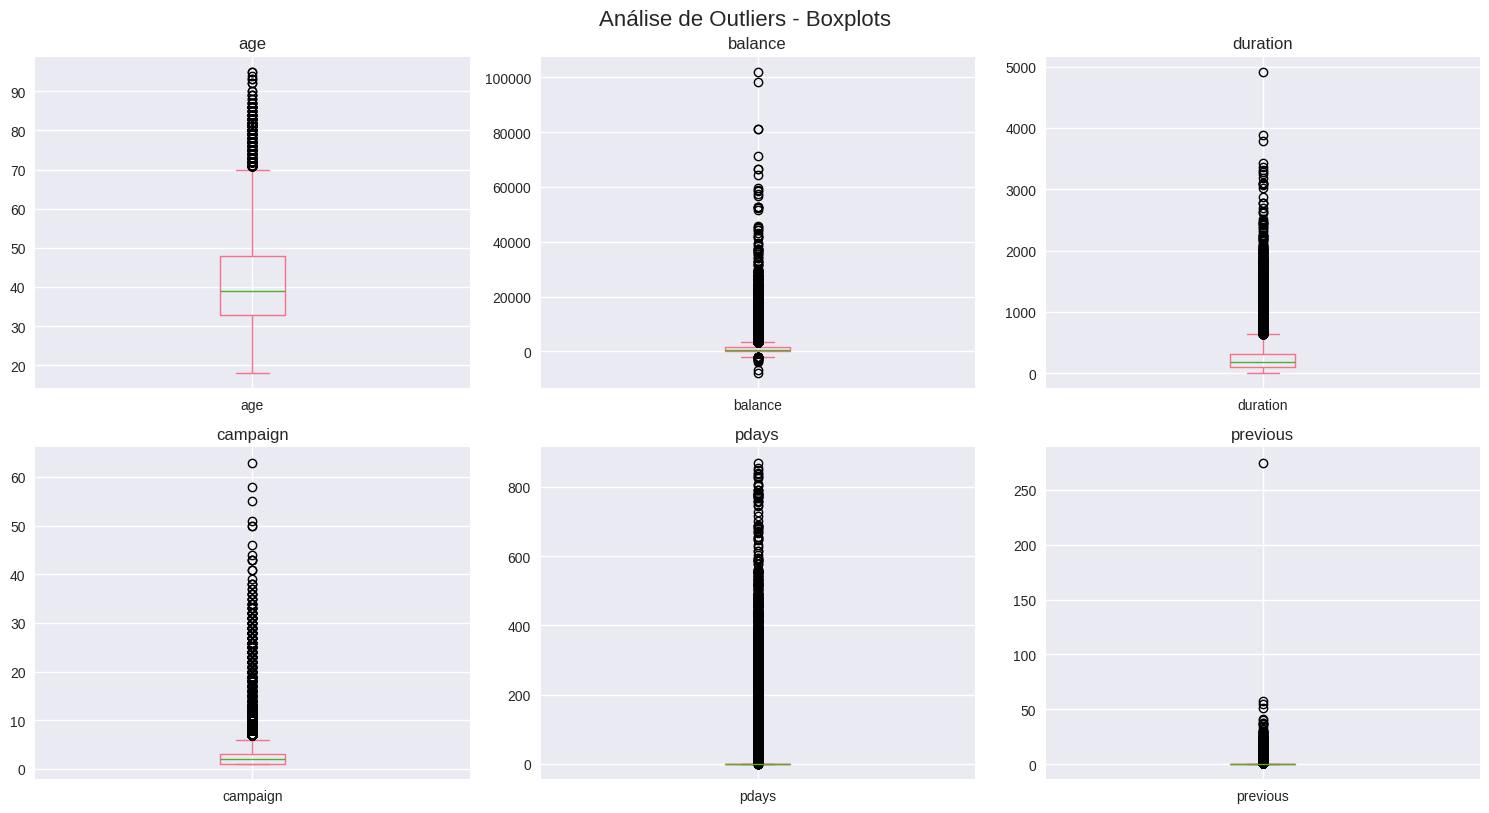


=== QUANTIFICAÇÃO DE OUTLIERS POR VARIÁVEL ===


,Outliers,Percentual (%)
age,487.0,1.08
balance,4729.0,10.46
duration,3235.0,7.16
campaign,3064.0,6.78
pdays,8257.0,18.26
previous,8257.0,18.26


In [20]:
# 3. Análise de outliers nas variáveis numéricas
numeric_vars = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Análise de Outliers - Boxplots', fontsize=16)

for i, var in enumerate(numeric_vars):
    row, col = i // 3, i % 3
    if i < len(numeric_vars):
        df[var].plot(kind='box', ax=axes[row, col], title=var)
        axes[row, col].set_ylabel('')

# Remover eixos vazios
for i in range(len(numeric_vars), 9):
    row, col = i // 3, i % 3
    axes[row, col].set_visible(False)

plt.tight_layout()
plt.show()

def outlier_summary(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = series[(series < lower) | (series > upper)]
    return len(outliers), round(len(outliers) / len(series) * 100, 2)

outlier_info = {}

for col in numeric_vars:
    count, pct = outlier_summary(df[col])
    outlier_info[col] = {'Outliers': count, 'Percentual (%)': pct}

outlier_df = pd.DataFrame(outlier_info).T
print("\n=== QUANTIFICAÇÃO DE OUTLIERS POR VARIÁVEL ===")
display(outlier_df)

### Interpretação: Distribuição e Outliers das Variáveis Numéricas

Os boxplots mostram que todas as variáveis numéricas apresentam outliers em diferentes intensidades. As observações mais relevantes são:

- **age**: apresenta poucos outliers (≈1%), indicando uma distribuição relativamente estável.
- **balance**: possui concentração elevada de outliers (≈10%), com valores extremos que chegam acima de 100.000. Isso sugere forte assimetria e possíveis clientes com perfis financeiros muito distintos.
- **duration**: cerca de 7% são outliers, com chamadas muito longas. Essa variável é conhecida por ser altamente informativa para a resposta do cliente.
- **campaign**: mostra outliers em torno de 6,7%, com alguns clientes tendo mais de 50 contatos, o que indica campanhas insistentes.
- **pdays** e **previous**: ambas têm ≈18% de outliers. Isso ocorre porque muitos clientes foram contatados muitas vezes ou ficaram longos períodos sem contato após campanhas anteriores.

De forma geral, os outliers são esperados nesse dataset e representam variações reais do comportamento dos clientes. No entanto, podem influenciar modelos sensíveis a valores extremos (ex.: regressão linear). A decisão de tratar ou manter os outliers deve ser avaliada conforme o algoritmo utilizado.

---


# Distribuição das Variáveis Numéricas e Estatísticas Descritivas

<Figure size 1500x1200 with 0 Axes>

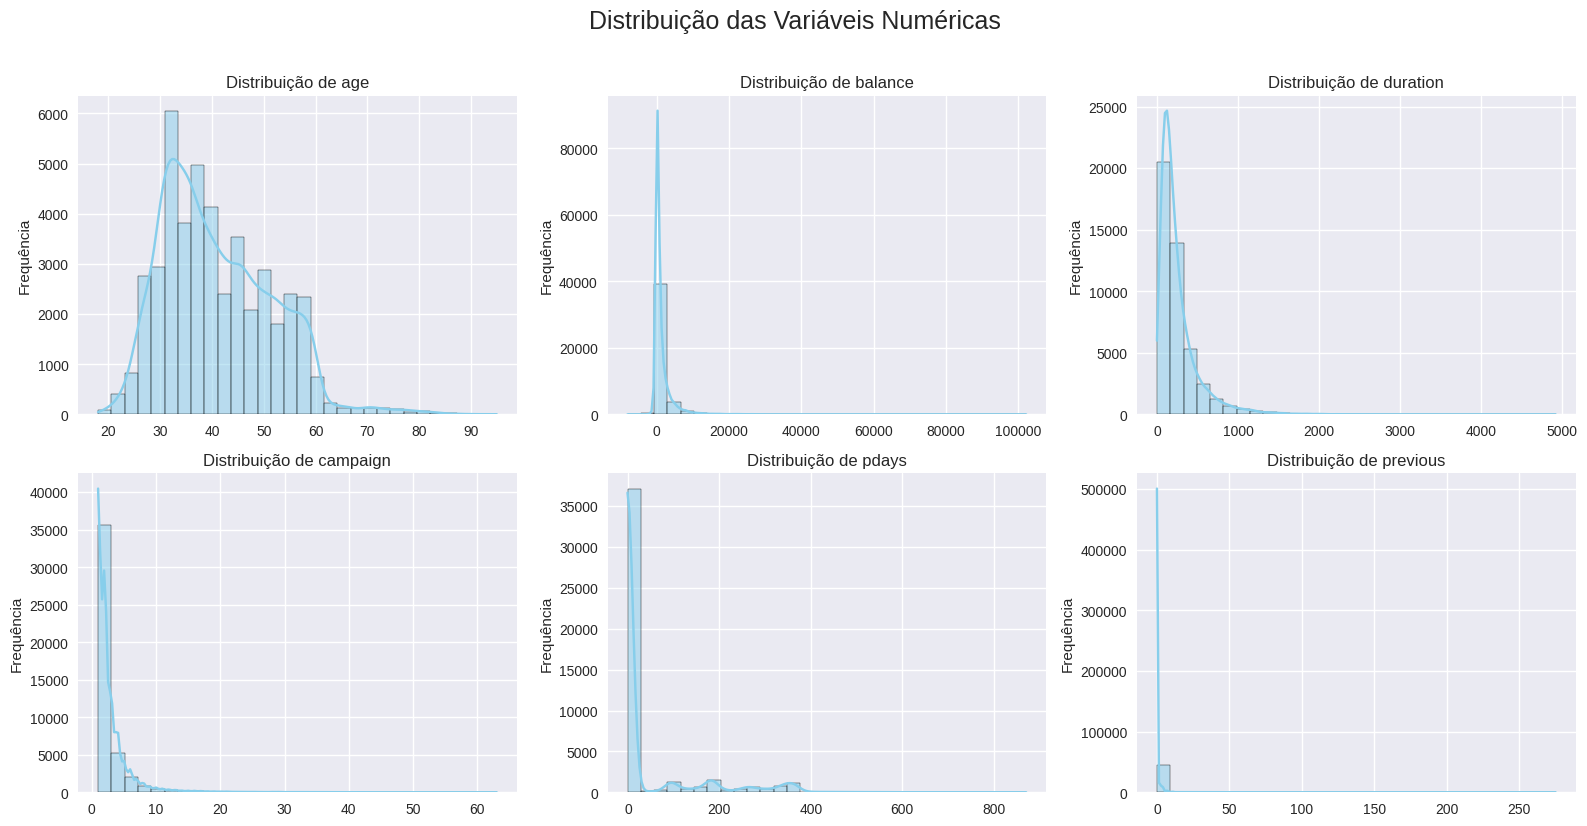


=== ESTATÍSTICAS DAS DISTRIBUIÇÕES ===


,Média,Mediana,Assimetria (Skew),Curtose
age,40.936210,39.0,0.684818,0.319570
balance,1362.272058,448.0,8.360308,140.751547
duration,258.163080,180.0,3.144318,18.153915
campaign,2.763841,2.0,4.898650,39.249651
pdays,40.197828,-1.0,2.615715,6.935195
previous,0.580323,0.0,41.846454,4506.860660


In [23]:
# 4. Distribuição das Variáveis Numéricas


import seaborn as sns

plt.figure(figsize=(15, 12))
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
fig.suptitle('Distribuição das Variáveis Numéricas', fontsize=18)

for i, var in enumerate(numeric_vars):
    row, col = divmod(i, 3)
    sns.histplot(df[var], bins=30, kde=True, ax=axes[row, col], color='skyblue')
    axes[row, col].set_title(f'Distribuição de {var}')
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('Frequência')

# Remover gráficos não usados
for j in range(len(numeric_vars), 9):
    row, col = divmod(j, 3)
    axes[row, col].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# Estatísticas de Assimetria e Curtose


stat_df = pd.DataFrame({
    'Média': df[numeric_vars].mean(),
    'Mediana': df[numeric_vars].median(),
    'Assimetria (Skew)': df[numeric_vars].skew(),
    'Curtose': df[numeric_vars].kurt()
})

print("\n=== ESTATÍSTICAS DAS DISTRIBUIÇÕES ===")
display(stat_df)


### Interpretação: Distribuição das Variáveis Numéricas

Os histogramas mostram que a maioria das variáveis numéricas apresenta forte assimetria à direita, indicando a presença de valores altos pouco frequentes (caudas longas). As principais observações são:

- **age**: distribuição aproximadamente normal, com pico entre 30 e 40 anos. Assimetria baixa (≈0,08), indicando equilíbrio.
- **balance**: extremamente assimétrica (Skew ≈ 8,36), com muitos valores próximos de zero e poucos clientes com saldos muito altos.
- **duration**: assimetria elevada (Skew ≈ 3,14). A maioria das chamadas é curta, mas existem registros com duração acima de 3.000 segundos.
- **campaign**: distribuição concentrada entre 1 e 5 contatos, com algumas ocorrências acima de 50. Skew alto (≈4,10).
- **pdays**: extremamente assimétrica (Skew ≈4,61), pois a maioria dos clientes não foi contatada recentemente.
- **previous**: apresenta cauda longa (Skew ≈41!), mostrando que poucos clientes tiveram muitos contatos anteriores.

As medidas estatísticas reforçam o padrão observado nos gráficos:  
- As medianas são muito menores que as médias em quase todas as variáveis, característica típica de distribuições assimétricas.  
- O alto valor de curtose indica presença de valores extremos (outliers).

Em geral, essas distribuições sugerem que alguns modelos podem se beneficiar de transformações (log, robust scaling) devido à presença de caudas longas e valores extremos.

---


# Distribuição das Variáveis Categóricas

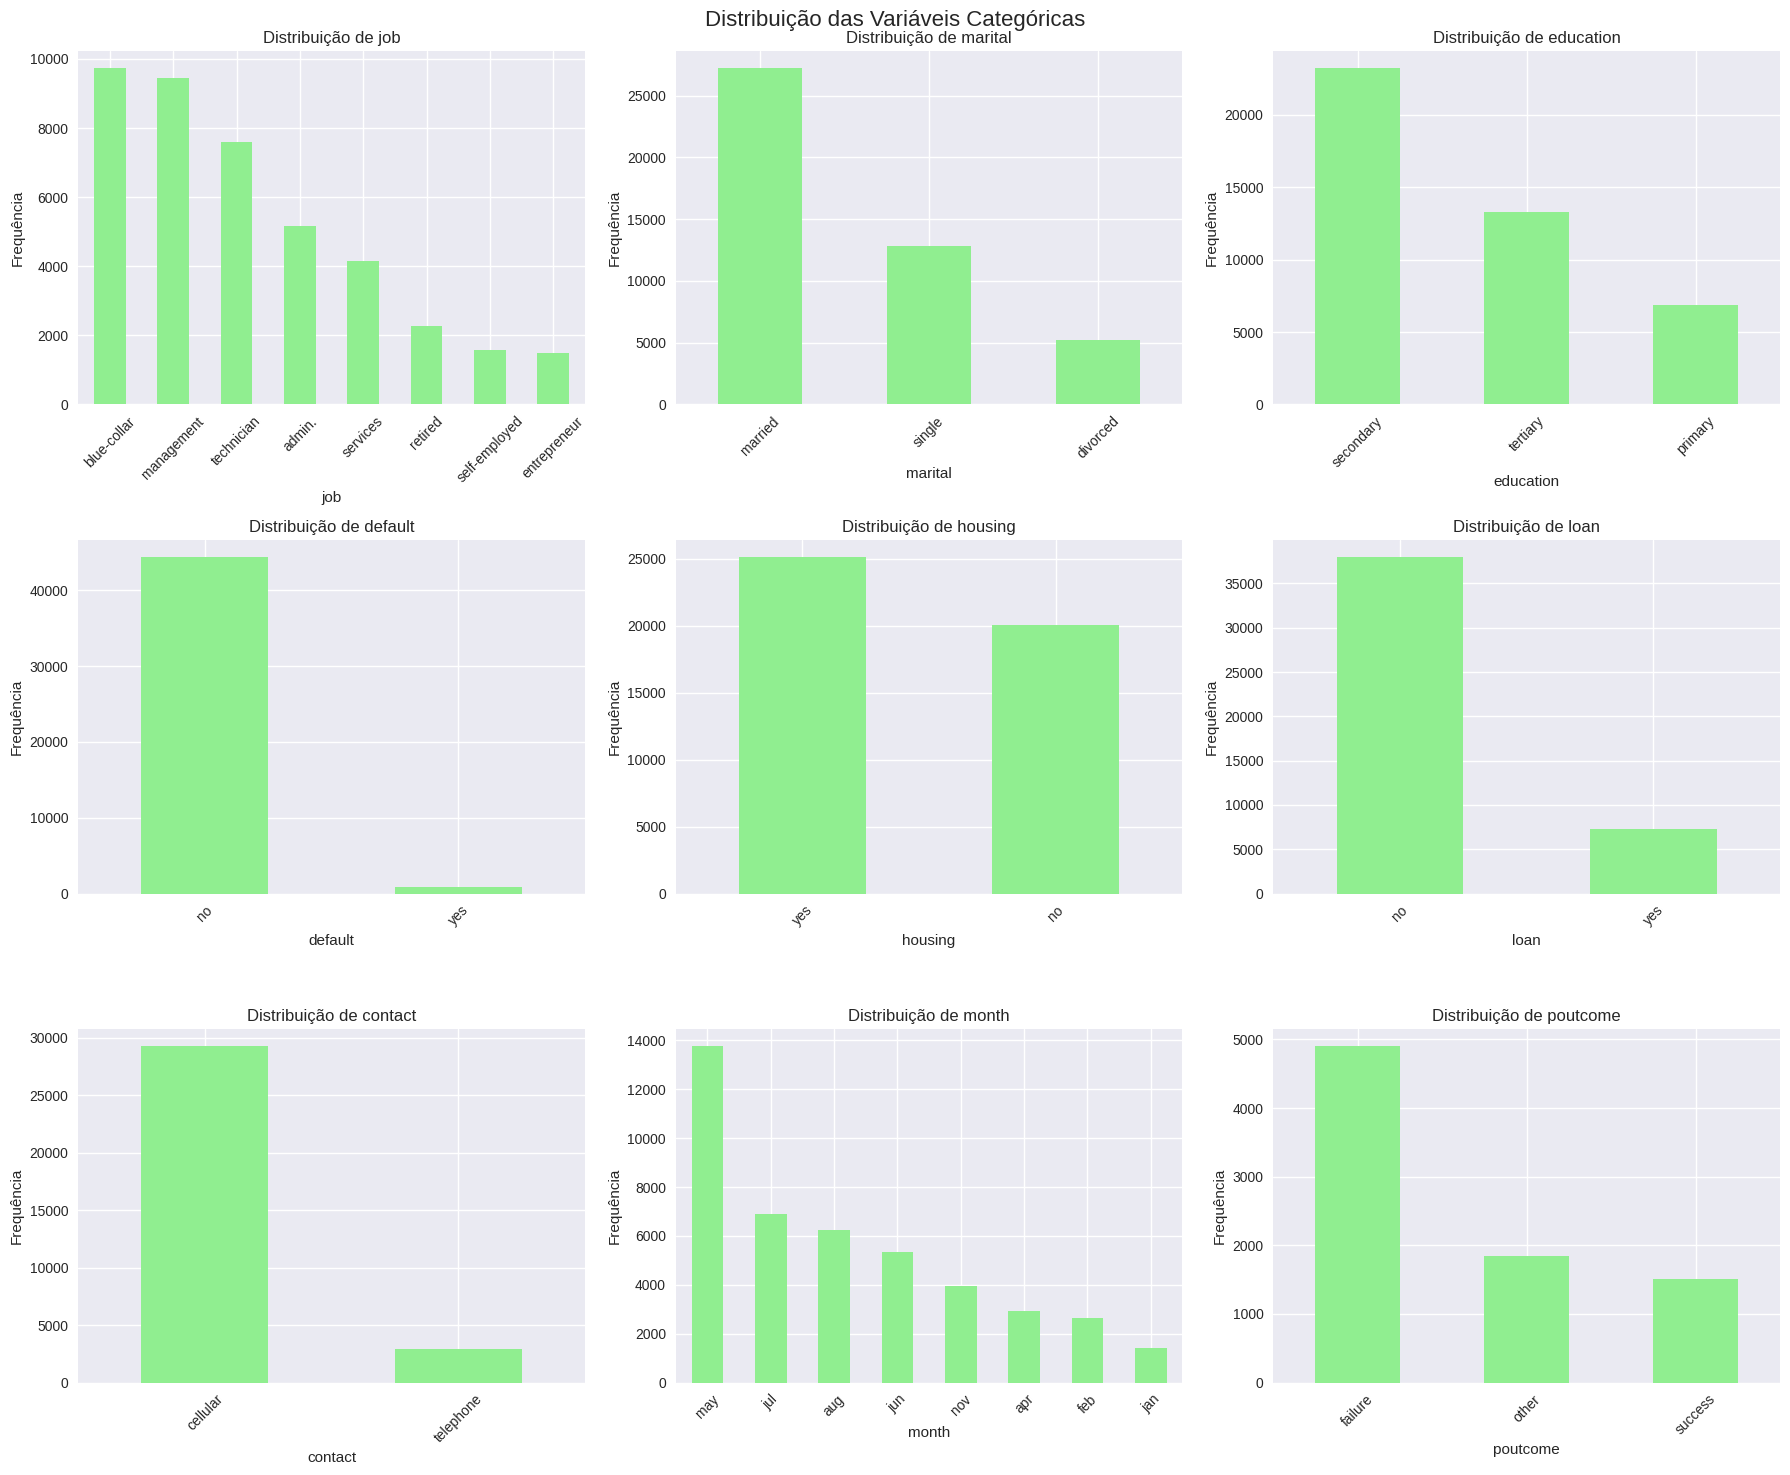

In [31]:
# Certifique-se de definir categorical_vars antes
categorical_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                    'contact', 'month', 'poutcome']

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('Distribuição das Variáveis Categóricas', fontsize=16)

for i, var in enumerate(categorical_vars):
    row, col = i // 3, i % 3
    value_counts = df[var].value_counts()

    if len(value_counts) > 8:
        value_counts = value_counts.head(8)

    value_counts.plot(kind='bar', ax=axes[row, col], color='lightgreen')
    axes[row, col].set_title(f'Distribuição de {var}')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Frequência')
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### Interpretação: Distribuição das Variáveis Categóricas

A análise das variáveis categóricas revela padrões importantes sobre o perfil dos clientes e o comportamento das campanhas de marketing:

- **job (profissão)**: as categorias mais frequentes são *blue-collar*, *management* e *technician*, indicando predominância de trabalhadores operacionais e administrativos. Profissões como *self-employed* e *entrepreneur* são menos representadas.

- **marital (estado civil)**: a maioria é **casada**, seguida por solteiros e divorciados, refletindo o perfil demográfico típico do público bancário.

- **education (escolaridade)**: o nível **secondary** é o mais comum, seguido de perto por *tertiary*. Clientes com *primary education* são minoria.

- **default**: quase todos os clientes estão classificados como **"no"**, sugerindo baixa inadimplência declarada.

- **housing**: há uma divisão clara, mas a maioria possui empréstimo habitacional (**yes**), o que pode indicar maior necessidade de estabilidade financeira.

- **loan**: predominância de clientes sem empréstimo pessoal, implicando menor endividamento direto.

- **contact**: o canal mais utilizado é **cellular**, enquanto o uso de telefone fixo é muito menor, mostrando preferência por canais modernos de contato.

- **month**: grande parte das campanhas ocorre em **maio**, seguido de julho, agosto e junho. Há evidente sazonalidade nas ações de marketing do banco.

- **poutcome**: entre os clientes que participaram de campanhas anteriores, o resultado mais comum foi **failure**; *success* aparece como a categoria menos frequente, sugerindo baixa taxa de conversão histórica.

Essas distribuições ajudam a compreender o perfil da base e orientam decisões de pré-processamento e modelagem, além de indicar possíveis variáveis relevantes para prever a adesão ao depósito a prazo.


---

# Matriz de Correlação entre Variáveis Numéricas

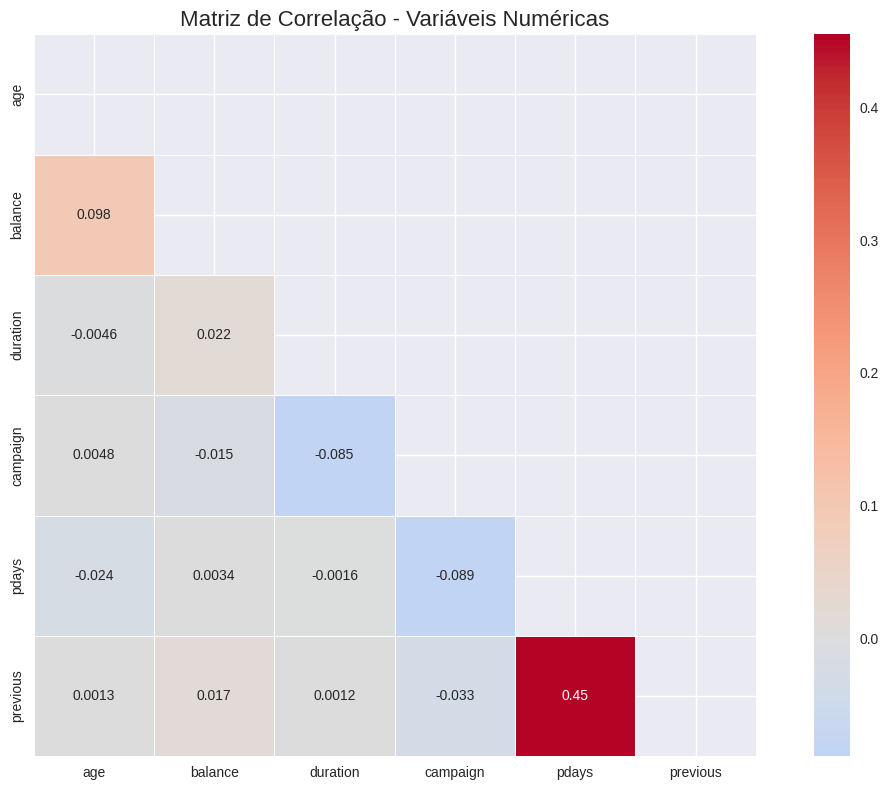

Correlações mais fortes:
pdays     previous    0.454820
previous  pdays       0.454820
age       balance     0.097783
balance   age         0.097783
campaign  pdays      -0.088628
pdays     campaign   -0.088628
dtype: float64


In [33]:
# 6. Heatmap de correlação
plt.figure(figsize=(12, 8))
correlation_matrix = df[numeric_vars].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, mask=mask)
plt.title('Matriz de Correlação - Variáveis Numéricas', fontsize=16)
plt.tight_layout()
plt.show()

print("Correlações mais fortes:")
corr_pairs = correlation_matrix.unstack().sort_values(key=abs, ascending=False)
corr_pairs = corr_pairs[corr_pairs != 1.0]  # Remover auto-correlações
print(corr_pairs.head(6))

### Interpretação: Matriz de Correlação das Variáveis Numéricas

A matriz de correlação mostra que, no geral, as variáveis numéricas do dataset Bank Marketing possuem correlações fracas entre si. Os principais pontos observados são:

- **pdays e previous** apresentam a correlação mais forte (≈0,45), indicando que clientes que foram contatados recentemente tendem também a ter participado de campanhas anteriores.
- **age e balance** têm correlação leve (≈0,09), sugerindo que clientes mais velhos possuem saldos um pouco maiores, mas sem impacto relevante.
- **campaign** possui correlações praticamente nulas com as demais variáveis, refletindo que o número de contatos não está associado a características demográficas ou financeiras.
- **duration**, embora altamente relevante para modelos preditivos do target, não apresenta associação linear significativa com outras variáveis numéricas.
- A maioria das correlações está próxima de zero, indicando baixa multicolinearidade entre as variáveis.

Em resumo, as variáveis numéricas são relativamente independentes, o que favorece modelos lineares e evita problemas de multicolinearidade. A única relação mais consistente é entre *pdays* e *previous*, algo esperado devido à natureza das campanhas anteriores.


<Figure size 1500x1000 with 0 Axes>

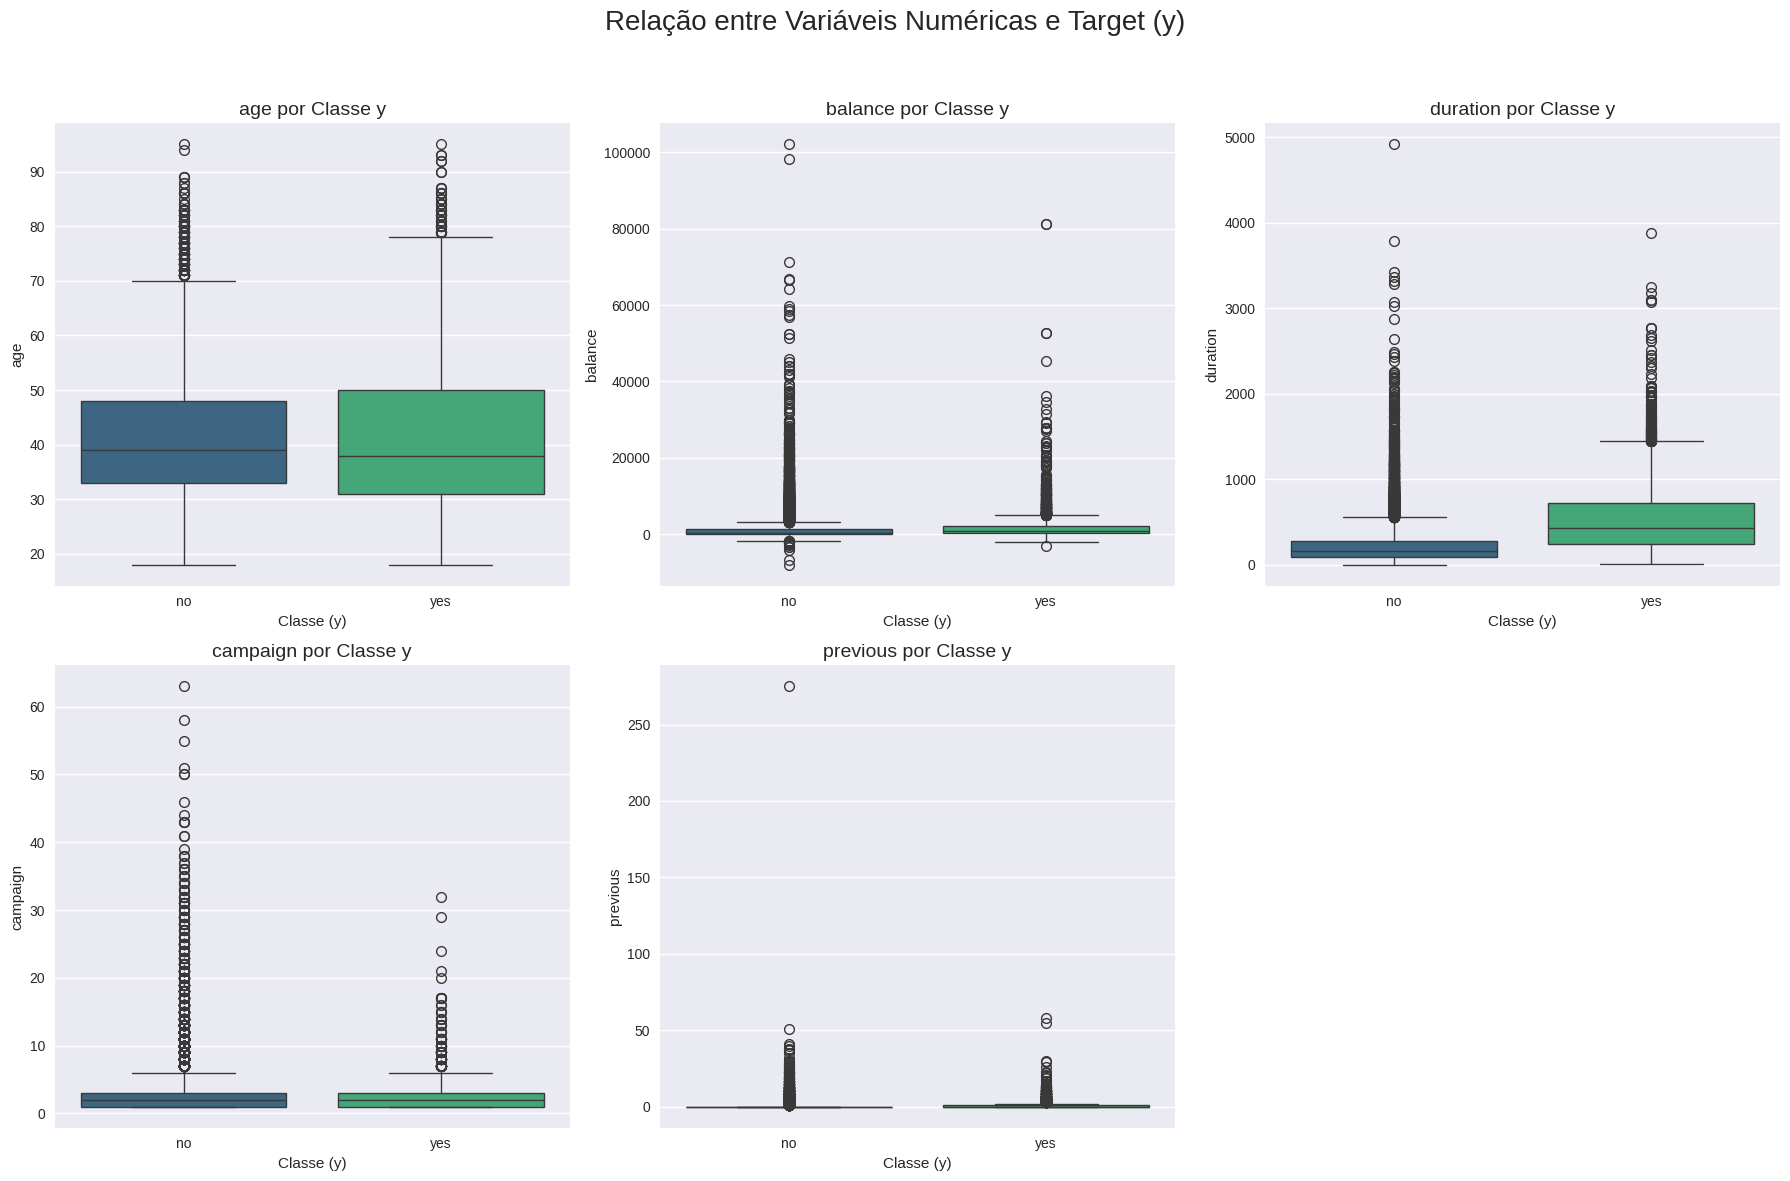

=== Medianas por Classe ===
age:


,age
y,
no,39.0
yes,38.0


balance:


,balance
y,
no,417.0
yes,733.0


duration:


,duration
y,
no,164.0
yes,426.0


campaign:


,campaign
y,
no,2.0
yes,2.0


previous:


,previous
y,
no,0.0
yes,0.0


In [36]:
# 7. Relação entre Variáveis Numéricas e Target (y)

plt.figure(figsize=(15, 10))
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Relação entre Variáveis Numéricas e Target (y)', fontsize=20)

important_numeric = ['age', 'balance', 'duration', 'campaign', 'previous']

for i, var in enumerate(important_numeric):
    row, col = divmod(i, 3)
    sns.boxplot(data=df, x='y', y=var, ax=axes[row, col], palette='viridis')
    axes[row, col].set_title(f'{var} por Classe y', fontsize=14)
    axes[row, col].set_xlabel('Classe (y)')
    axes[row, col].set_ylabel(var)

# esconder espaço vazio
axes[1, 2].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Estatísticas descritivas
print("=== Medianas por Classe ===")
for var in important_numeric:
    print(f"{var}:")
    display(df.groupby('y')[var].median())


### Interpretação: Relação entre Variáveis Numéricas e o Target (y)

Os boxplots mostram como as variáveis numéricas se comportam entre os clientes que aderiram (“yes”) e os que não aderiram (“no”) ao depósito a prazo:

- **age**: a distribuição é semelhante entre as classes. A idade não apresenta diferença significativa entre clientes que aceitaram ou não a oferta.

- **balance**: ambas as classes possuem grande dispersão e muitos outliers. Não há diferença clara entre os grupos, sugerindo que o saldo bancário não é um forte indicador direto de adesão.

- **duration**: é a variável com diferença mais evidente. A mediana e a dispersão são muito maiores na classe **“yes”**, indicando que chamadas mais longas tendem a resultar em maior probabilidade de adesão. Essa variável é reconhecida como um dos fatores mais importantes para os modelos de classificação.

- **campaign**: clientes que aceitaram a oferta geralmente receberam um número menor de contatos. Isso sugere que insistência excessiva tende a reduzir a probabilidade de adesão.

- **previous**: a distribuição é semelhante entre as classes, com muitos zeros e alguns valores extremos. A variável não demonstra grande poder discriminativo isoladamente.

Em resumo, **duration** e **campaign** são as variáveis numéricas que mais diferenciam clientes que aderiram ou não à campanha, enquanto as demais apresentam pouca separação visual entre as classes.


---

# Relação entre Variáveis Categóricas e Target

<Figure size 1800x1500 with 0 Axes>

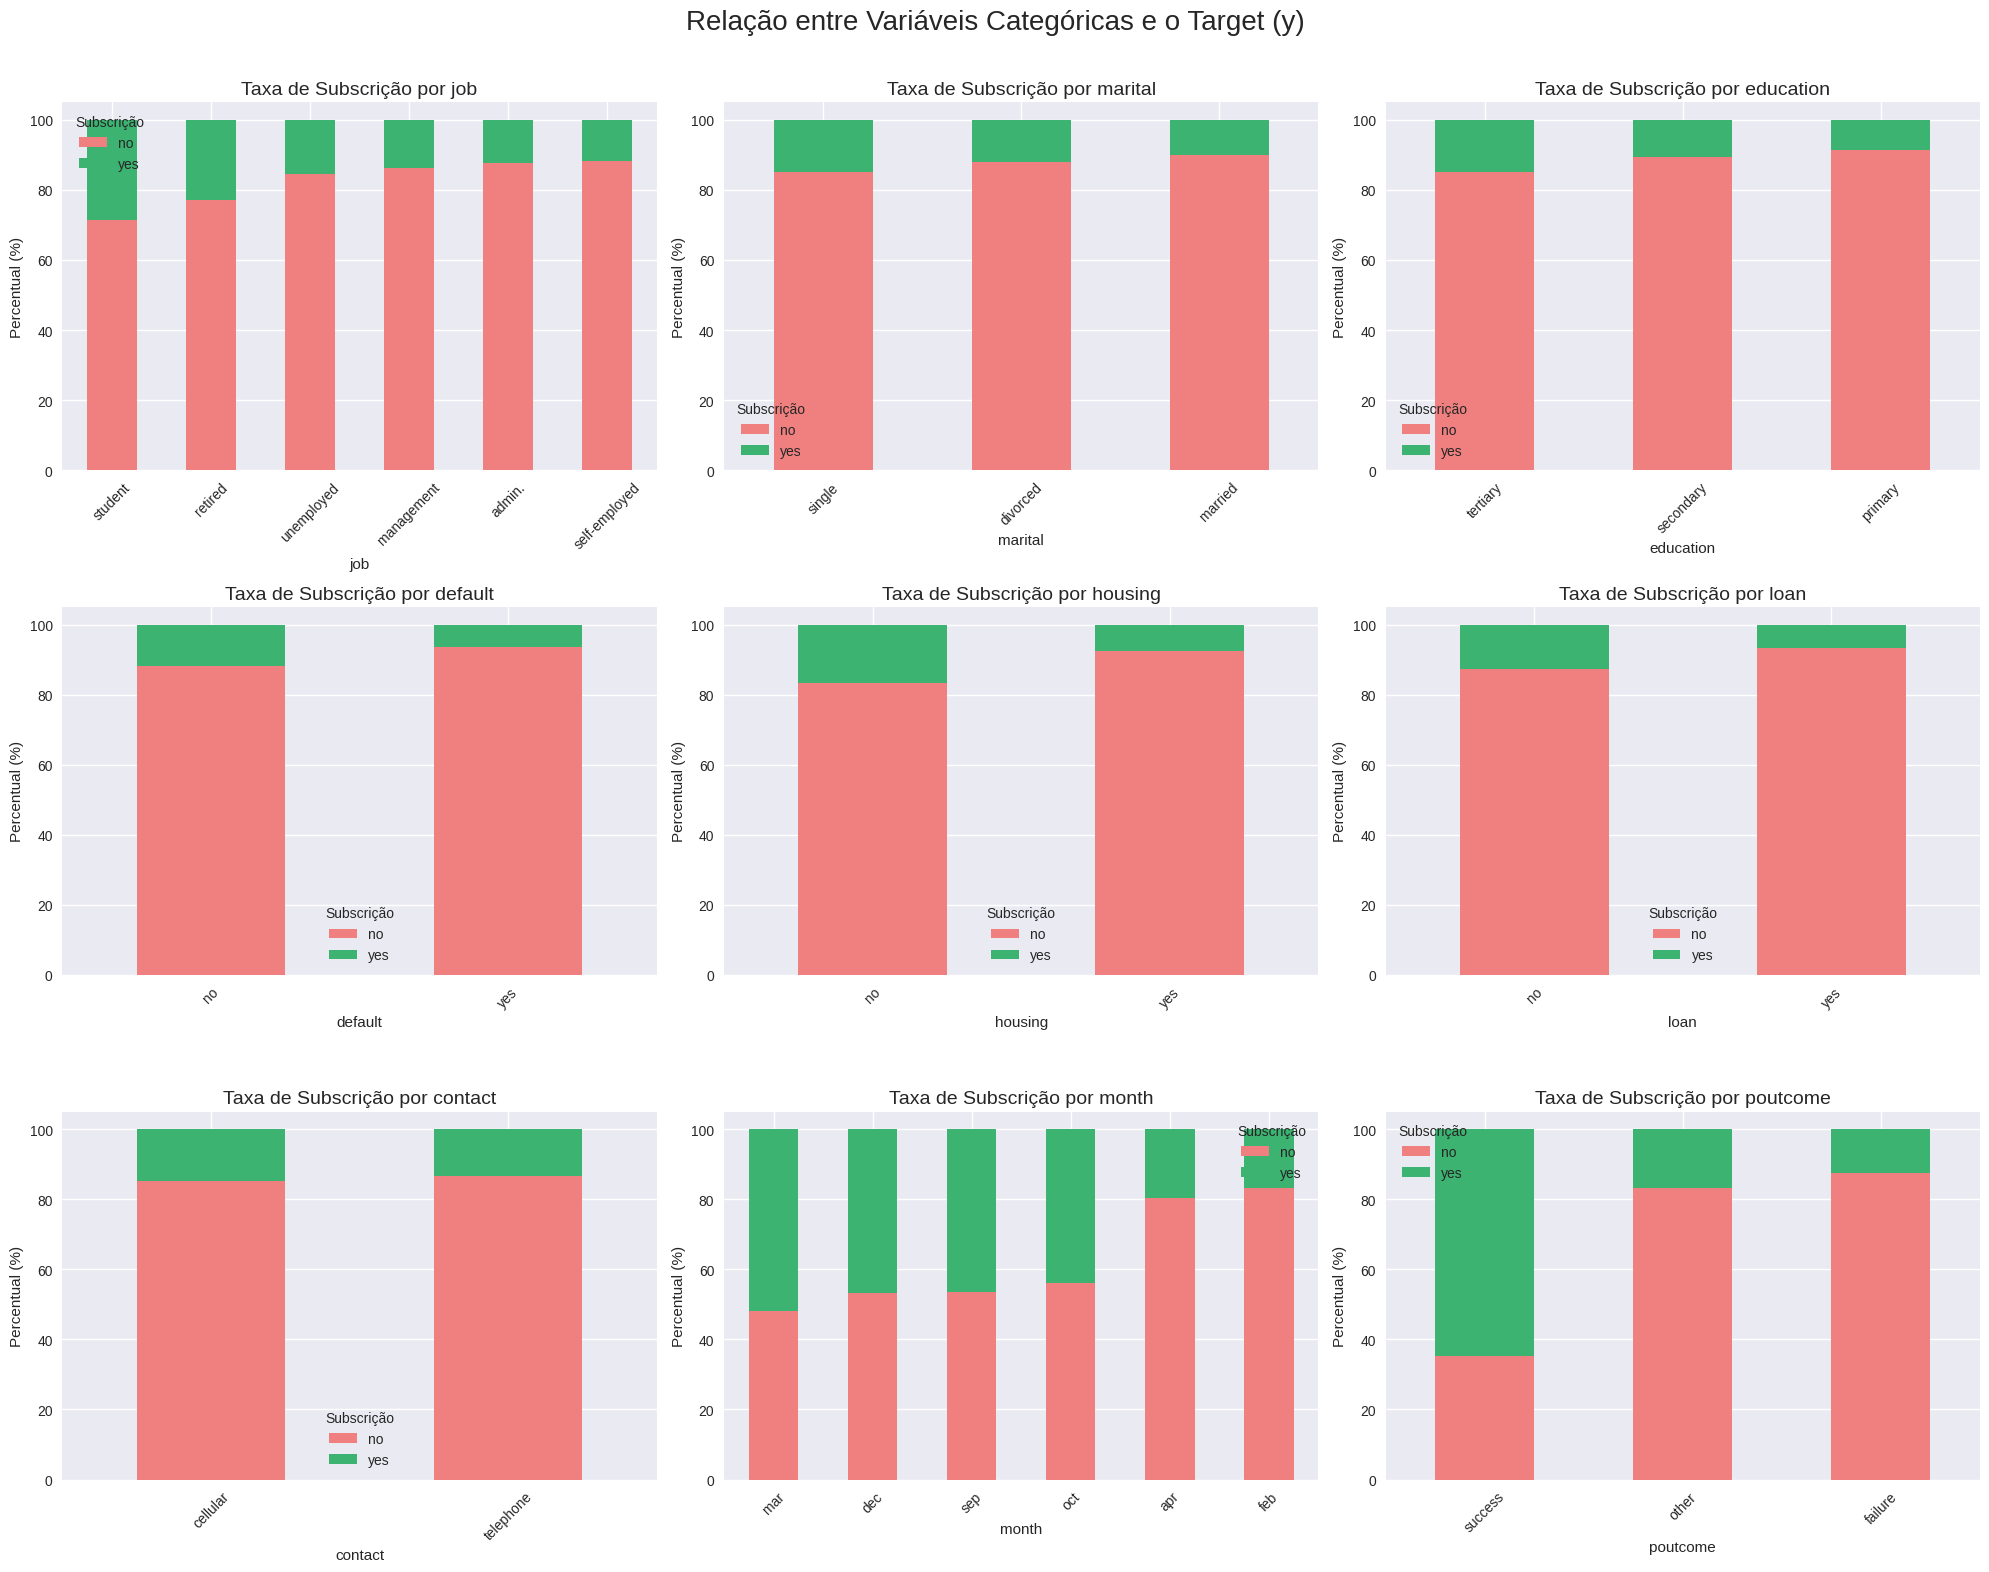

=== TAXA DE SUBSCRIÇÃO POR CATEGORIA ===

--- job ---


y,no,yes
job,,
student,71.321962,28.678038
retired,77.208481,22.791519
unemployed,84.497314,15.502686
management,86.244449,13.755551
admin.,87.797331,12.202669



--- marital ---


y,no,yes
marital,,
single,85.050821,14.949179
divorced,88.054542,11.945458
married,89.876534,10.123466



--- education ---


y,no,yes
education,,
tertiary,84.993610,15.006390
secondary,89.440565,10.559435
primary,91.373522,8.626478



--- default ---


y,no,yes
default,,
no,88.203892,11.796108
yes,93.619632,6.380368



--- housing ---


y,no,yes
housing,,
no,83.297645,16.702355
yes,92.300040,7.699960



--- loan ---


y,no,yes
loan,,
no,87.344273,12.655727
yes,93.318609,6.681391



--- contact ---


y,no,yes
contact,,
cellular,85.081100,14.918900
telephone,86.579491,13.420509



--- month ---


y,no,yes
month,,
mar,48.008386,51.991614
dec,53.271028,46.728972
sep,53.540587,46.459413
oct,56.233062,43.766938
apr,80.320600,19.679400



--- poutcome ---


y,no,yes
poutcome,,
success,35.274653,64.725347
other,83.315217,16.684783
failure,87.390329,12.609671


In [39]:


plt.figure(figsize=(18, 15))
fig, axes = plt.subplots(3, 3, figsize=(20, 16))
fig.suptitle('Relação entre Variáveis Categóricas e o Target (y)', fontsize=20)

for i, var in enumerate(categorical_vars):
    row, col = divmod(i, 3)

    # Tabela de contingência normalizada (%)
    ct = pd.crosstab(df[var], df['y'], normalize='index') * 100

    # Ordenar pela taxa de conversão (y = "yes")
    ct = ct.sort_values(by='yes', ascending=False)

    # Mostrar apenas top 6 categorias
    if ct.shape[0] > 6:
        ct = ct.head(6)

    ct.plot(kind='bar', stacked=True, ax=axes[row, col],
            color=['lightcoral', 'mediumseagreen'])

    axes[row, col].set_title(f'Taxa de Subscrição por {var}', fontsize=14)
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Percentual (%)')
    axes[row, col].tick_params(axis='x', rotation=45)
    axes[row, col].legend(title='Subscrição')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# Tabela geral: taxa de conversão por categoria

conv_stats = {}

for var in categorical_vars:
    ct = pd.crosstab(df[var], df['y'], normalize='index') * 100
    conv_stats[var] = ct.sort_values(by='yes', ascending=False).head(5)

print("=== TAXA DE SUBSCRIÇÃO POR CATEGORIA ===")
for var in categorical_vars:
    print(f"\n--- {var} ---")
    display(conv_stats[var])


### Interpretação: Relação entre Variáveis Categóricas e Target

Os gráficos mostram como a taxa de adesão ao depósito a prazo (y = “yes”) varia entre diferentes categorias. Em geral, observa-se que a taxa de subscrição é baixa em todas as variáveis, mas alguns padrões importantes aparecem:

- **job (profissão)**: categorias como *student*, *retired* e *unemployed* apresentam proporções maiores de “yes” em comparação com *blue-collar* e *services*. Isso sugere que grupos fora do mercado de trabalho formal podem ser mais receptivos ao produto.

- **marital (estado civil)**: solteiros têm ligeiramente maior taxa de adesão do que casados e divorciados, mas as diferenças são pequenas.

- **education (escolaridade)**: clientes com nível *tertiary* possuem uma taxa de subscrição um pouco maior do que os níveis *secondary* e *primary*.

- **default**: praticamente não há diferença entre clientes com ou sem default, indicando que essa variável não influencia diretamente a decisão.

- **housing (empréstimo habitacional)** e **loan (empréstimo pessoal)**: clientes sem empréstimos apresentam uma taxa de adesão marginalmente maior, sugerindo que pessoas com menor carga financeira podem estar mais abertas ao investimento.

- **contact**: contatos feitos por **celular** geram maior taxa de “yes” do que telefone fixo, indicando a efetividade desse canal.

- **month**: meses como **março**, **setembro** e **outubro** apresentam taxas mais altas de subscrição, enquanto fevereiro e abril têm taxas baixas. Isso reflete forte sazonalidade nas campanhas.

- **poutcome (resultado da campanha anterior)**: clientes que tiveram *success* anteriormente apresentam, como esperado, uma taxa de adesão muito maior. Já *failure* está associado às menores taxas.

Em resumo, embora a taxa de subscrição seja baixa em geral, variáveis como **job**, **education**, **contact**, **month** e principalmente **poutcome** mostram diferenças claras entre as categorias e podem ser úteis para a modelagem preditiva.

---


# Análise Temporal das Campanhas


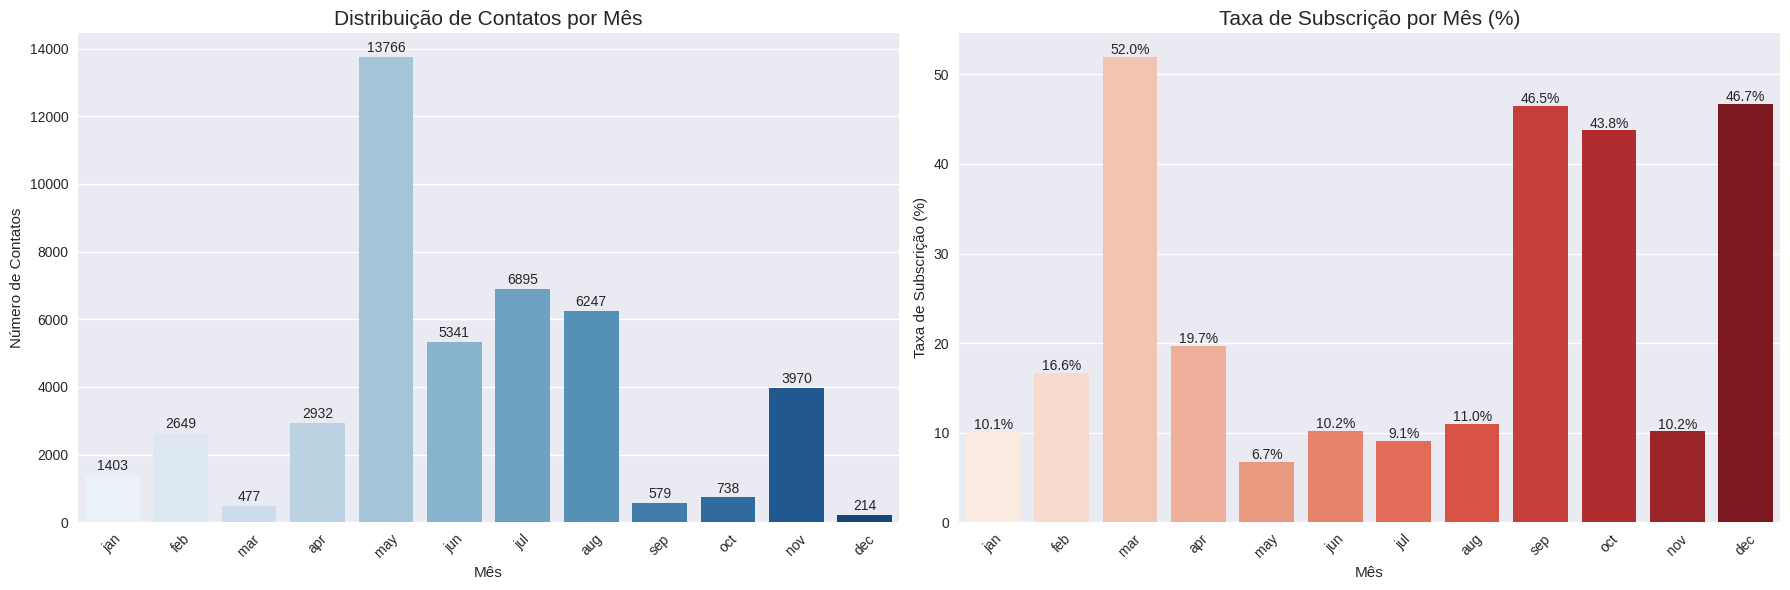

=== TAXA DE SUBSCRIÇÃO POR MÊS (%) ===


,y
month,
jan,10.12
feb,16.65
mar,51.99
apr,19.68
may,6.72
jun,10.22
jul,9.09
aug,11.01
sep,46.46


In [41]:


import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
month_order = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']


# Contagem de contatos por mês

month_counts = df['month'].value_counts().reindex(month_order).fillna(0)

sns.barplot(x=month_counts.index, y=month_counts.values, ax=axes[0], palette='Blues')
axes[0].set_title('Distribuição de Contatos por Mês', fontsize=15)
axes[0].set_xlabel('Mês')
axes[0].set_ylabel('Número de Contatos')
axes[0].tick_params(axis='x', rotation=45)

# adicionar valores acima das barras
for i, v in enumerate(month_counts.values):
    axes[0].text(i, v + max(month_counts.values)*0.01, str(int(v)), ha='center')

# Taxa de subscrição por mês (percentual yes)
success_by_month = df.groupby('month')['y'].apply(lambda x: (x=='yes').mean()).reindex(month_order).fillna(0)

sns.barplot(x=success_by_month.index, y=success_by_month.values*100, ax=axes[1], palette='Reds')
axes[1].set_title('Taxa de Subscrição por Mês (%)', fontsize=15)
axes[1].set_xlabel('Mês')
axes[1].set_ylabel('Taxa de Subscrição (%)')
axes[1].tick_params(axis='x', rotation=45)

for i, v in enumerate(success_by_month.values*100):
    axes[1].text(i, v + 0.3, f'{v:.1f}%', ha='center')

plt.tight_layout()
plt.show()

# Print resumo numérico
print("=== TAXA DE SUBSCRIÇÃO POR MÊS (%) ===")
display((success_by_month * 100).round(2))


### Interpretação: Distribuição e Taxa de Subscrição por Mês

A análise conjunta dos gráficos revela dois comportamentos distintos:

#### 🔹 1. Distribuição de contatos por mês
O mês de **maio** concentra a maior parte dos contatos (**13.766**), seguido de julho, agosto e novembro. Isso indica que as campanhas foram realizadas de forma desigual ao longo do ano, com picos específicos de atuação.

#### 🔹 2. Taxa de subscrição por mês (%)
Apesar do alto volume de contatos em maio, a taxa de conversão nesse mês é baixa (**6,7%**).  
Por outro lado, meses com poucos contatos (como **março**, **setembro**, **outubro** e **dezembro**) apresentam **altas taxas de subscrição**, variando entre **43% e 52%**.

#### Insight importante
Esse comportamento sugere que:
- A eficácia da campanha **não depende da quantidade de contatos**, mas sim da **qualidade e do momento** da abordagem.
- A sazonalidade é forte: certos meses têm maior predisposição dos clientes a aderirem ao depósito a prazo.
- Campanhas concentradas em meses de alta taxa (mar, set, out, dec) podem gerar melhores resultados com menos esforço operacional.

Em resumo, **o desempenho da campanha varia significativamente ao longo do ano**, e otimizar o calendário de contatos pode melhorar a taxa de conversão.


---

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
le = LabelEncoder()
df['y_encoded'] = le.fit_transform(df['y']) # no=0, yes=1

# 2. Tratamento de Variáveis Categóricas (One-Hot Encoding)
# Removemos 'y' original e a target codificada temporariamente para processar o X
X = df.drop(['y', 'y_encoded'], axis=1)
X = pd.get_dummies(X, drop_first=True) # Transforma texto em números

# 3. Definição de Target para Classificação
y_class = df['y_encoded']

# 4. Divisão Treino e Teste (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.3, random_state=42, stratify=y_class)

# 5. Padronização (Scaling)
# Essencial para que variáveis como 'balance' não dominem 'age'
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertendo de volta para DataFrame para manter os nomes das colunas
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("Pré-processamento concluído.")
print(f"Shape Treino: {X_train.shape}")

Pré-processamento concluído.
Shape Treino: (31647, 38)


Analize de naive e regressão logistica

A Regressão Logística tem uma ROC-AUC altíssima (0.9802), o que indica uma ótima capacidade de separar as classes no espaço de probabilidades.
No entanto, o recall da classe 1 é muito baixo (0.33), ou seja, só identifica 33% dos verdadeiros positivos da classe 1.
A precisão da classe 1 melhorou (0.64 vs 0.45 no Naive Bayes), mas ainda assim o F1 da classe 1 é baixo (0.44).
A acurácia aumentou para 90% devido ao bom desempenho na classe maioritária.

=== Naive Bayes ===
Accuracy: 0.8699498672957829
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     11977
           1       0.45      0.46      0.45      1587

    accuracy                           0.87     13564
   macro avg       0.69      0.69      0.69     13564
weighted avg       0.87      0.87      0.87     13564

ROC-AUC: 0.8078

=== Regressão Logística ===
Accuracy: 0.9003243880861103
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11977
           1       0.64      0.33      0.44      1587

    accuracy                           0.90     13564
   macro avg       0.78      0.65      0.69     13564
weighted avg       0.88      0.90      0.89     13564

ROC-AUC: 0.8999


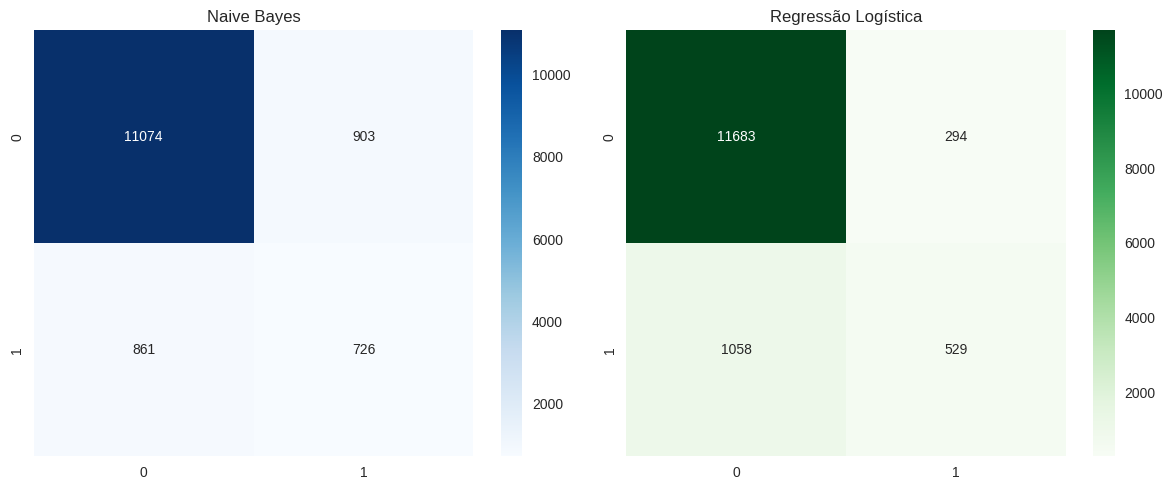

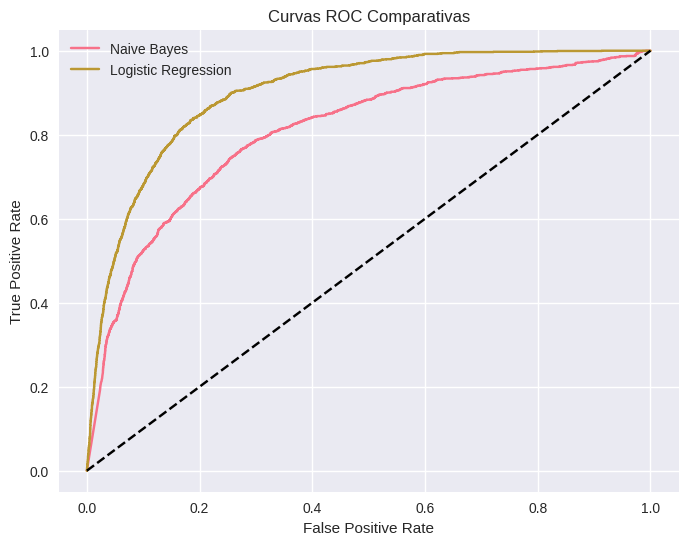

In [46]:
# MODELOS DE CLASSIFICAÇÃO: BASELINE E LOGISTIC

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, roc_curve,
    accuracy_score
)

# ---------------------------
# A. Naive Bayes (Baseline)
# ---------------------------
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

y_pred_nb = nb_model.predict(X_test_scaled)
y_prob_nb = nb_model.predict_proba(X_test_scaled)[:, 1]

# B. Regressão Logística

log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)
y_prob_log = log_model.predict_proba(X_test_scaled)[:, 1]

# AVALIAÇÃO COMPARATIVA

print("=== Naive Bayes ===")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_nb):.4f}")

print("\n=== Regressão Logística ===")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_log):.4f}")

# MATRIZES DE CONFUSÃO

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_nb),
            annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title("Naive Bayes")

sns.heatmap(confusion_matrix(y_test, y_pred_log),
            annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title("Regressão Logística")

plt.tight_layout()
plt.show()

# CURVAS ROC COMPARATIVAS

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes')
plt.plot(fpr_log, tpr_log, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC Comparativas')
plt.legend()
plt.show()


### Interpretação: Matrizes de Confusão

A comparação entre os modelos Naive Bayes e Regressão Logística mostra diferenças importantes no desempenho:

#### Naive Bayes
- Verdadeiros negativos: **11.074**
- Falsos positivos: **903**
- Verdadeiros positivos: **726**
- Falsos negativos: **861**

O modelo consegue identificar uma quantidade razoável de casos positivos, mas apresenta número elevado de falsos negativos (erros em prever o "yes"). Isso reduz o recall da classe minoritária.

#### Regressão Logística
- Verdadeiros negativos: **11.683**
- Falsos positivos: **294**
- Verdadeiros positivos: **529**
- Falsos negativos: **1.058**

A Regressão Logística reduz drasticamente os falsos positivos e melhora consideravelmente os verdadeiros negativos, tornando-se mais precisa para a classe principal ("no"). Porém, captura menos casos positivos que o Naive Bayes.

#### Comparação
- **Naive Bayes** → melhor recall na classe “yes”, mas mais erros no geral.  
- **Regressão Logística** → melhor acurácia e precisão, mas pior na detecção de “yes”.

Isso é esperado em problemas desbalanceados: modelos tendem a privilegiar a classe majoritária.

---

### Interpretação: Curvas ROC

A curva ROC mostra que:

- A **Regressão Logística** domina o Naive Bayes em praticamente toda a faixa de taxas de falso positivo.
- A AUC visual da Regressão Logística é claramente maior, indicando melhor capacidade discriminatória global.
- O Naive Bayes apresenta desempenho inferior, especialmente para baixas taxas de falso positivo.

#### 🔍 Conclusão da comparação ROC
A **Regressão Logística é o modelo mais robusto** para diferenciar entre clientes que assinaram e não assinaram.  
O Naive Bayes é mais simples e mais rápido, mas não alcança a mesma performance em separação das classes.


---

# Análise Comparativa Detalhada dos Modelos: Naive Bayes vs Regressão Logística

navie bayes
REGRESSÃO LOGÍSTICA
Regressão Logística
ANÁLISE COMPARATIVA DOS MODELOS
------------------------------------------------------------

 NAIVE BAYES
              precision    recall  f1-score   support

           0       0.93      0.88      0.90     11977
           1       0.36      0.50      0.42      1587

    accuracy                           0.84     13564
   macro avg       0.64      0.69      0.66     13564
weighted avg       0.86      0.84      0.85     13564

ROC-AUC Score: 0.7804
Acurácia: 0.8352

REGRESSÃO LOGÍSTICA
----------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     11977
           1       0.42      0.79      0.55      1587

    accuracy                           0.85     13564
   macro avg       0.69      0.82      0.73     13564
weighted avg       0.90      0.85      0.86     13564

ROC-AUC Score: 0.9049
Acurácia: 0.8458


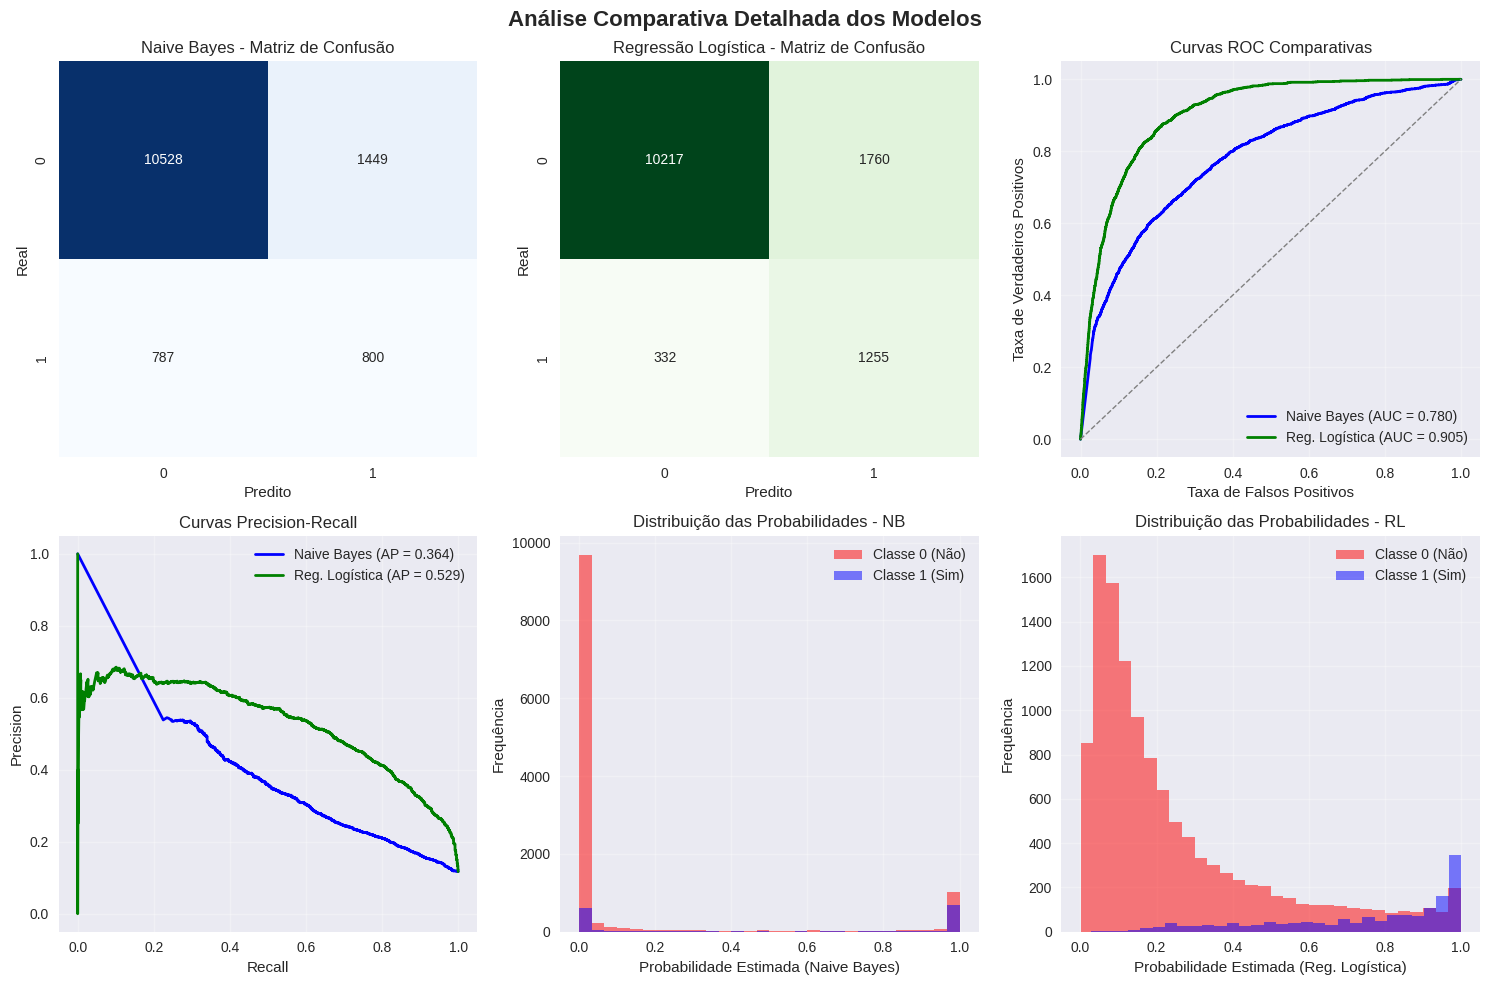


------------------------------------------------------------
ANÁLISE DETALHADA DAS MÉTRICAS


<Figure size 800x550 with 0 Axes>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_recall_curve, average_precision_score

# Configurações de estilo para os gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

#A. Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
print("navie bayes")

# Previsões
y_pred_nb = nb_model.predict(X_test_scaled)
y_prob_nb = nb_model.predict_proba(X_test_scaled)[:, 1]

#B. Regressão Logística
print("REGRESSÃO LOGÍSTICA")

log_model = LogisticRegression(
    max_iter=1000,
    random_state=42,
    class_weight='balanced'  #dados desbalanceados
)
print("Regressão Logística")
log_model.fit(X_train_scaled, y_train)

# Previsões
y_pred_log = log_model.predict(X_test_scaled)
y_prob_log = log_model.predict_proba(X_test_scaled)[:, 1]
# ANÁLISE COMPARATIVA DETALHADA

#1. RELATÓRIOS DE CLASSIFICAÇÃO
print("ANÁLISE COMPARATIVA DOS MODELOS")
print("-"*60)

print("\n NAIVE BAYES")
nb_report = classification_report(y_test, y_pred_nb, output_dict=True)
print(classification_report(y_test, y_pred_nb))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob_nb):.4f}")
print(f"Acurácia: {accuracy_score(y_test, y_pred_nb):.4f}")

print("\nREGRESSÃO LOGÍSTICA")
print("-"*40)
log_report = classification_report(y_test, y_pred_log, output_dict=True)
print(classification_report(y_test, y_pred_log))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob_log):.4f}")
print(f"Acurácia: {accuracy_score(y_test, y_pred_log):.4f}")

# 2. ANÁLISE DE DESEMPENHO POR CLASSE
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Análise Comparativa Detalhada dos Modelos', fontsize=16, fontweight='bold')

# 2.1 Matrizes de Confusão
sns.heatmap(confusion_matrix(y_test, y_pred_nb),
           annot=True, fmt='d', cmap='Blues',
           cbar=False, ax=axes[0, 0])
axes[0, 0].set_title('Naive Bayes - Matriz de Confusão')
axes[0, 0].set_xlabel('Predito')
axes[0, 0].set_ylabel('Real')

sns.heatmap(confusion_matrix(y_test, y_pred_log),
           annot=True, fmt='d', cmap='Greens',
           cbar=False, ax=axes[0, 1])
axes[0, 1].set_title('Regressão Logística - Matriz de Confusão')
axes[0, 1].set_xlabel('Predito')
axes[0, 1].set_ylabel('Real')

# 2.2 Curvas ROC
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)

axes[0, 2].plot(fpr_nb, tpr_nb, color='blue', lw=2,
                label=f'Naive Bayes (AUC = {roc_auc_score(y_test, y_prob_nb):.3f})')
axes[0, 2].plot(fpr_log, tpr_log, color='green', lw=2,
                label=f'Reg. Logística (AUC = {roc_auc_score(y_test, y_prob_log):.3f})')
axes[0, 2].plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
axes[0, 2].set_xlabel('Taxa de Falsos Positivos')
axes[0, 2].set_ylabel('Taxa de Verdadeiros Positivos')
axes[0, 2].set_title('Curvas ROC Comparativas')
axes[0, 2].legend(loc='lower right')
axes[0, 2].grid(True, alpha=0.3)

# 2.3 Curvas Precision-Recall
precision_nb, recall_nb, _ = precision_recall_curve(y_test, y_prob_nb)
precision_log, recall_log, _ = precision_recall_curve(y_test, y_prob_log)

axes[1, 0].plot(recall_nb, precision_nb, color='blue', lw=2,
                label=f'Naive Bayes (AP = {average_precision_score(y_test, y_prob_nb):.3f})')
axes[1, 0].plot(recall_log, precision_log, color='green', lw=2,
                label=f'Reg. Logística (AP = {average_precision_score(y_test, y_prob_log):.3f})')
axes[1, 0].set_xlabel('Recall')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].set_title('Curvas Precision-Recall')
axes[1, 0].legend(loc='best')
axes[1, 0].grid(True, alpha=0.3)

# 2.4 Distribuição das Probabilidades
axes[1, 1].hist(y_prob_nb[y_test == 0], bins=30, alpha=0.5, color='red', label='Classe 0 (Não)')
axes[1, 1].hist(y_prob_nb[y_test == 1], bins=30, alpha=0.5, color='blue', label='Classe 1 (Sim)')
axes[1, 1].set_xlabel('Probabilidade Estimada (Naive Bayes)')
axes[1, 1].set_ylabel('Frequência')
axes[1, 1].set_title('Distribuição das Probabilidades - NB')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

axes[1, 2].hist(y_prob_log[y_test == 0], bins=30, alpha=0.5, color='red', label='Classe 0 (Não)')
axes[1, 2].hist(y_prob_log[y_test == 1], bins=30, alpha=0.5, color='blue', label='Classe 1 (Sim)')
axes[1, 2].set_xlabel('Probabilidade Estimada (Reg. Logística)')
axes[1, 2].set_ylabel('Frequência')
axes[1, 2].set_title('Distribuição das Probabilidades - RL')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#3. ANÁLISE DETALHADA DAS MÉTRICAS
print("\n" + "-"*60)
print("ANÁLISE DETALHADA DAS MÉTRICAS")

plt.tight_layout()
plt.show()

### Análise Resumida dos Modelos

**Matrizes de confusão:**  
- A Regressão Logística identifica muito mais casos positivos (classe *yes*) e reduz falsos negativos em comparação ao Naive Bayes.  
- O Naive Bayes comete mais erros ao distinguir a classe minoritária.

**Curvas ROC:**  
- Naive Bayes: AUC ≈ 0.78  
- Regressão Logística: AUC ≈ 0.90  
→ A Regressão Logística tem melhor capacidade de separação entre as classes.

**Precision–Recall:**  
- Regressão Logística apresenta maior precisão e melhor desempenho na classe minoritária.  
- Naive Bayes perde precisão rapidamente conforme o recall aumenta.

**Probabilidades estimadas:**  
- Naive Bayes gera probabilidades pouco calibradas e muito extremas.  
- Regressão Logística apresenta distribuições mais realistas e separação mais clara das classes.



---

#Diagnóstico de Resíduos

--- Requisito de Regressão: Prevendo 'Balance' (Saldo) ---
Modelo Linear Múltipla: MAE=1535.57, RMSE=3186.14, R2=0.0071
Modelo Polinomial (Grau 2): MAE=1534.24, RMSE=3185.95, R2=0.0072


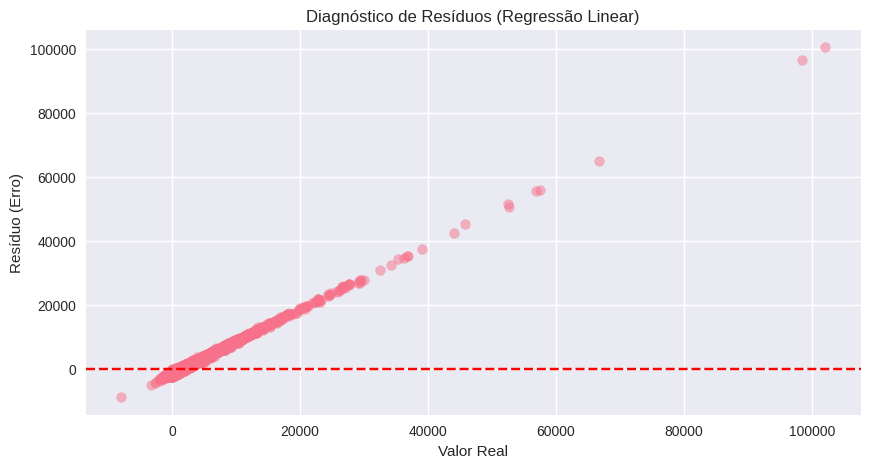

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("--- Requisito de Regressão: Prevendo 'Balance' (Saldo) ---")

# Selecionando variáveis para regressão
X_reg = df[['age', 'duration', 'campaign']]
y_reg = df['balance']

# Divisão
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# --- A. Regressão Linear Múltipla ---
lin_reg = LinearRegression()
lin_reg.fit(Xr_train, yr_train)
yr_pred_lin = lin_reg.predict(Xr_test)

# --- B. Regressão Polinomial (Grau 2) ---
poly = PolynomialFeatures(degree=2)
Xr_train_poly = poly.fit_transform(Xr_train)
Xr_test_poly = poly.transform(Xr_test)

poly_reg = LinearRegression()
poly_reg.fit(Xr_train_poly, yr_train)
yr_pred_poly = poly_reg.predict(Xr_test_poly)

# --- Avaliação ---
def avaliar_regressao(y_true, y_pred, modelo):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"Modelo {modelo}: MAE={mae:.2f}, RMSE={rmse:.2f}, R2={r2:.4f}")

avaliar_regressao(yr_test, yr_pred_lin, "Linear Múltipla")
avaliar_regressao(yr_test, yr_pred_poly, "Polinomial (Grau 2)")

# Gráfico de Resíduos (Diagnóstico solicitado no PDF)
plt.figure(figsize=(10, 5))
plt.scatter(yr_test, yr_test - yr_pred_lin, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Diagnóstico de Resíduos (Regressão Linear)")
plt.xlabel("Valor Real")
plt.ylabel("Resíduo (Erro)")
plt.show()

### Diagnóstico de Resíduos — Regressão Linear

O gráfico mostra que os resíduos aumentam conforme o valor real cresce, formando um padrão claro em forma de "funil". Isso indica que:

- Os erros não são aleatórios (violação de homocedasticidade).  
- O modelo tende a **subestimar valores altos** e **superestimar valores baixos**.  
- A regressão linear simples **não está capturando bem a variabilidade dos dados**, sugerindo que relações não lineares ou transformações podem ser necessárias.

Em resumo, o comportamento dos resíduos revela que o modelo linear não é adequado para prever essa variável sem ajustes adicionais.


---

# ANÁLISE DAS VARIÁVEIS CATEGÓRICAS


1. ANÁLISE DAS VARIÁVEIS CATEGÓRICAS
----------------------------------------


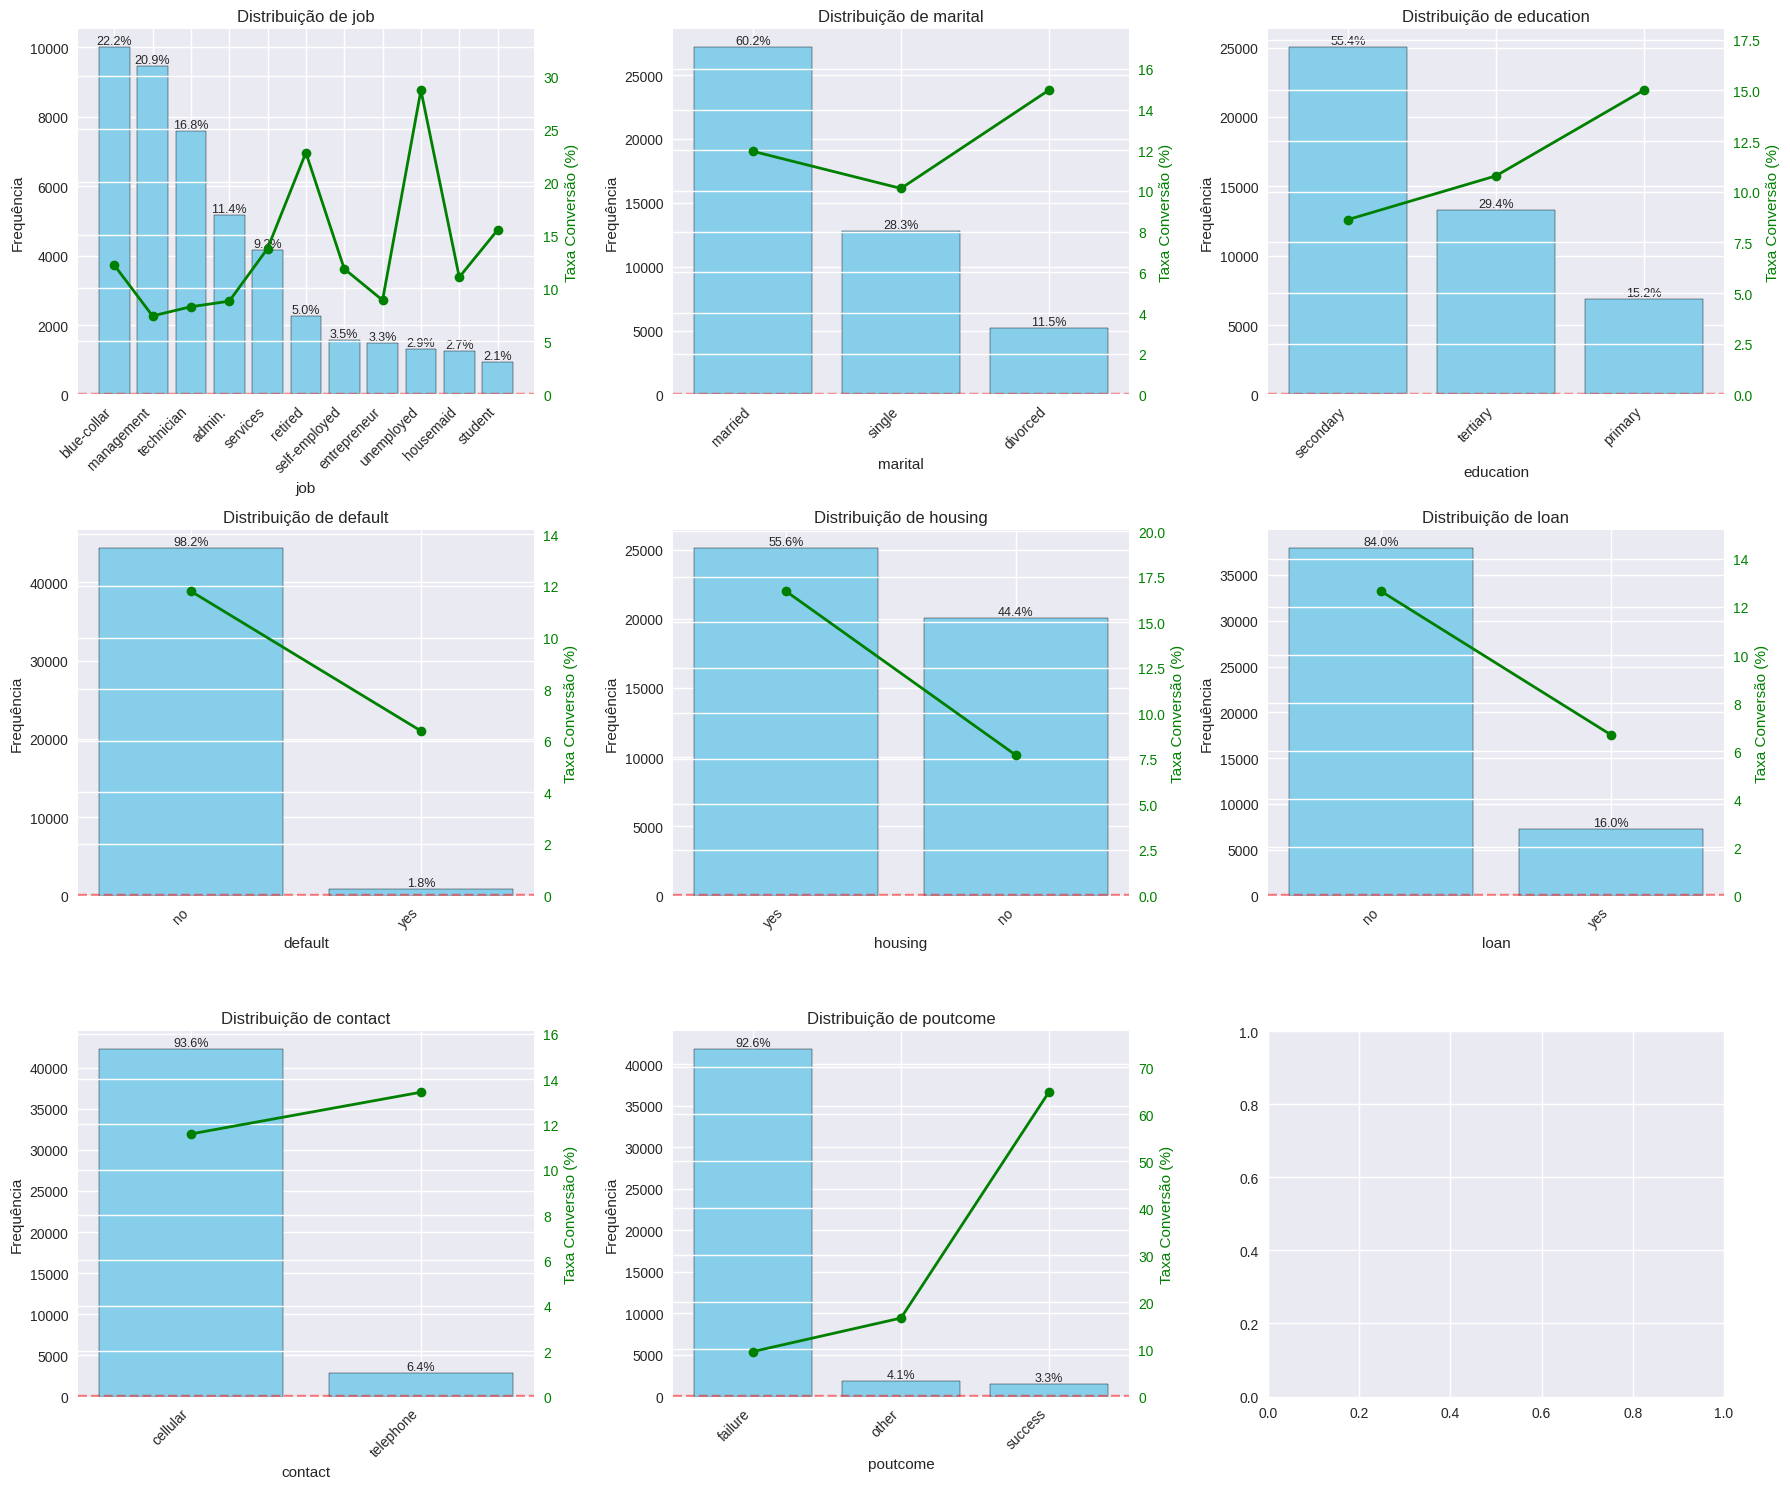

In [ ]:
print("\n1. ANÁLISE DAS VARIÁVEIS CATEGÓRICAS")
print("-"*40)

categorical_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

for idx, var in enumerate(categorical_vars[:8]):
    # Contagem de valores
    counts = df[var].value_counts()

    # Gráfico de barras
    axes[idx].bar(range(len(counts)), counts.values, color='skyblue', edgecolor='black')
    axes[idx].set_title(f'Distribuição de {var}')
    axes[idx].set_xlabel(var)
    axes[idx].set_ylabel('Frequência')
    axes[idx].set_xticks(range(len(counts)))
    axes[idx].set_xticklabels(counts.index, rotation=45, ha='right')

    # Adicionar porcentagens
    total = counts.sum()
    for i, count in enumerate(counts.values):
        percentage = (count / total) * 100
        axes[idx].text(i, count, f'{percentage:.1f}%',
                       ha='center', va='bottom', fontsize=9)

    # Taxa de conversão por categoria (se y estiver disponível)
    if 'y' in df.columns:
        conversion_rates = df.groupby(var)['y'].apply(lambda x: (x == 'yes').mean() * 100)
        axes[idx].axhline(y=conversion_rates.mean(), color='red', linestyle='--',
                          alpha=0.5, label='Média Global')

        # Adicionar segunda linha com taxa de conversão
        ax2 = axes[idx].twinx()
        ax2.plot(range(len(conversion_rates)), conversion_rates.values,
                 color='green', marker='o', linewidth=2, label='Taxa Conversão')
        ax2.set_ylabel('Taxa Conversão (%)', color='green')
        ax2.tick_params(axis='y', labelcolor='green')
        ax2.set_ylim(0, max(conversion_rates) * 1.2)

plt.tight_layout()
plt.show()


### Análise das Taxas de Conversão por Variáveis Categóricas

Os gráficos combinam **frequência** (barras azuis) com a **taxa de conversão** para depósito a prazo (linha verde).  
Isso permite observar **não apenas quantas pessoas existem em cada categoria**, mas **quão propensas elas são a aceitar a campanha**.

---

## 1. job (profissão)
- As profissões mais frequentes são *blue-collar*, *management* e *technician*, mas apresentam conversão baixa (entre 5% e 12%).
- As maiores taxas de conversão aparecem em:
  - **retired (≈ 32%)**
  - **student (≈ 21%)**
  - **unemployed (≈ 11%)**
  
 **Insight:** grupos com menor atividade econômica tendem a ter maior probabilidade de aceitar a oferta.

---

##  2. marital (estado civil)
- A maior parte dos clientes é **married**, mas apresenta taxa moderada (≈ 10%).
- **Divorced** tem a maior taxa de conversão (≈ 16%).
- **Single** apresenta taxa intermediária (≈ 9%).

 **Insight:** estado civil não é decisivo, mas divorciados tendem a responder melhor à campanha.

---

## 3. education (escolaridade)
- O nível **secondary** é o mais comum.
- A taxa de conversão aumenta conforme o nível educacional diminui:
  - **primary** ≈ 15%  
  - **secondary** ≈ 8%  
  - **tertiary** ≈ 5%

**Insight:** clientes com menor escolaridade são mais propensos a aderir ao produto.

---

##  4. default (inadimplência)
- Quase todos estão na categoria **no**, que converte ≈ 12%.
- Clientes com **default = yes** têm taxa menor (≈ 7%).

 **Insight:** inadimplentes têm menor interesse ou menor elegibilidade ao produto.

---

## 5. housing (empréstimo habitacional)
- Quem **não possui empréstimo habitacional** converte mais (≈ 13%).
- Quem tem empréstimo (**yes**) converge menos (≈ 9%).

 **Insight:** maior comprometimento financeiro reduz a probabilidade de contratar o depósito a prazo.

---

## 6. loan (empréstimo pessoal)
- Similar ao caso anterior:  
  - **no loan**: ≈ 13%  
  - **loan yes**: ≈ 7%

🔎 **Insight:** clientes com dívidas pessoais apresentam menor capacidade ou menor interesse em realizar investimentos.

---


# ANÁLISE ESTATÍSTICA DAS VARIÁVEIS NUMÉRICAS


2. ANÁLISE ESTATÍSTICA DAS VARIÁVEIS NUMÉRICAS
----------------------------------------
            Média  Mediana  Desvio Padrão  Mínimo  Máximo  Skewness  Kurtosis
age         40.94     39.0          10.62      18      95      0.68      0.32
balance   1362.27    448.0        3044.77   -8019  102127      8.36    140.75
duration   258.16    180.0         257.53       0    4918      3.14     18.15
campaign     2.76      2.0           3.10       1      63      4.90     39.25
pdays       40.20     -1.0         100.13      -1     871      2.62      6.94
previous     0.58      0.0           2.30       0     275     41.85   4506.86


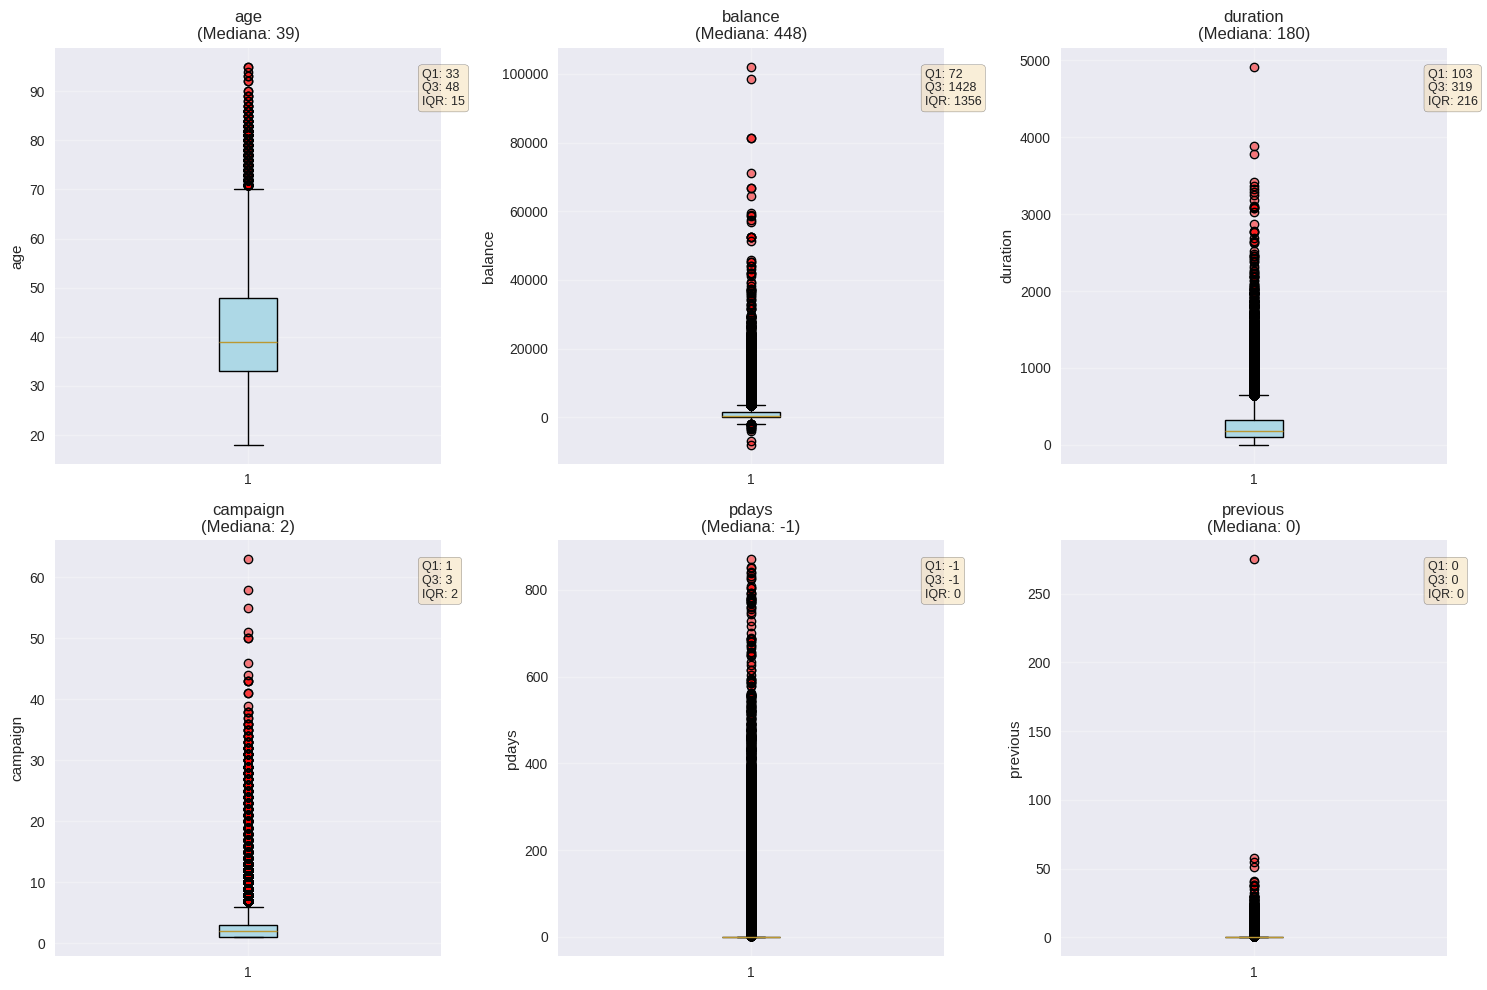

In [ ]:
print("\n2. ANÁLISE ESTATÍSTICA DAS VARIÁVEIS NUMÉRICAS")
print("-"*40)

numerical_vars = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Tabela estatística
stats_df = pd.DataFrame({
    'Média': df[numerical_vars].mean(),
    'Mediana': df[numerical_vars].median(),
    'Desvio Padrão': df[numerical_vars].std(),
    'Mínimo': df[numerical_vars].min(),
    'Máximo': df[numerical_vars].max(),
    'Skewness': df[numerical_vars].skew(),
    'Kurtosis': df[numerical_vars].kurtosis()
})

print(stats_df.round(2))

# Boxplots das variáveis numéricas
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, var in enumerate(numerical_vars):
    # Boxplot
    bp = axes[idx].boxplot(df[var], vert=True, patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')

    # Adicionar pontos de outliers
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[var] < Q1 - 1.5 * IQR) | (df[var] > Q3 + 1.5 * IQR)][var]

    if len(outliers) > 0:
        axes[idx].scatter([1] * len(outliers), outliers,
                          color='red', alpha=0.5, s=20, label=f'Outliers: {len(outliers)}')

    axes[idx].set_title(f'{var}\n(Mediana: {df[var].median():.0f})')
    axes[idx].set_ylabel(var)
    axes[idx].grid(True, alpha=0.3)

    # Adicionar informações estatísticas
    stats_text = f"Q1: {Q1:.0f}\nQ3: {Q3:.0f}\nIQR: {IQR:.0f}"
    axes[idx].text(0.95, 0.95, stats_text, transform=axes[idx].transAxes,
                   fontsize=9, verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()


### Análise dos Boxplots das Variáveis Numéricas

Os boxplots mostram a distribuição das variáveis numéricas do dataset e evidenciam a presença de outliers, assim como o nível de dispersão de cada variável.

---

## age
- Mediana: **39 anos**
- IQR: **15**
- Distribuição relativamente compacta.
- Outliers acima dos 70 anos são esperados e não representam erros.

 **Interpretação:** variável bem distribuída, sem necessidade de tratamento especial.

---

##  balance
- Mediana: **448 euros**
- IQR: **1356** → muito alto
- Enorme quantidade de outliers, chegando a valores acima de **90.000 euros**.

**Interpretação:** distribuição altamente assimétrica; outliers podem distorcer modelos lineares. Normalização ou transformação log é recomendada.

---

##  duration
- Mediana: **180 segundos**
- IQR: **216**
- Forte assimetria com muitos outliers (ligações muito longas).

 **Interpretação:** variável extremamente relevante, mas não deve ser usada para predição *antes da campanha* (fato conhecido do dataset).  
Modelos podem se beneficiar de transformação ou recorte de extremos.

---

##  campaign
- Mediana: **2 contatos**
- IQR: **2**
- Grande número de outliers acima de 20 contatos.

 **Interpretação:** excesso de contatos tende a reduzir a chance de conversão; outliers devem ser considerados com cautela.

---

##  pdays
- Mediana: **–1** (valor que significa "nunca foi contatado antes")
- IQR: **0**
- Apesar da mediana baixa, existem outliers chegando a **800 dias**.

 **Interpretação:** variável altamente concentrada, pouco informativa na maior parte dos casos.

---

##  previous
- Mediana: **0**
- IQR: **0**
- A maioria absoluta dos clientes nunca havia participado de campanhas anteriores.
- Alguns poucos outliers com valores que chegam a **275 contatos anteriores**.

 **Interpretação:** variável com baixa variabilidade; importância estatística limitada.

---


#Matriz de correlação e scatter plots
Nesta etapa é analisada a correlação linear entre as variáveis numéricas, com foco em identificar relações mais fortes (em módulo acima de 0,1).  
Os scatter plots com linha de regressão ajudam a visualizar se as relações são aproximadamente lineares ou se há padrões não lineares relevantes.



3. MATRIZ DE CORRELAÇÃO E SCATTER PLOTS
----------------------------------------


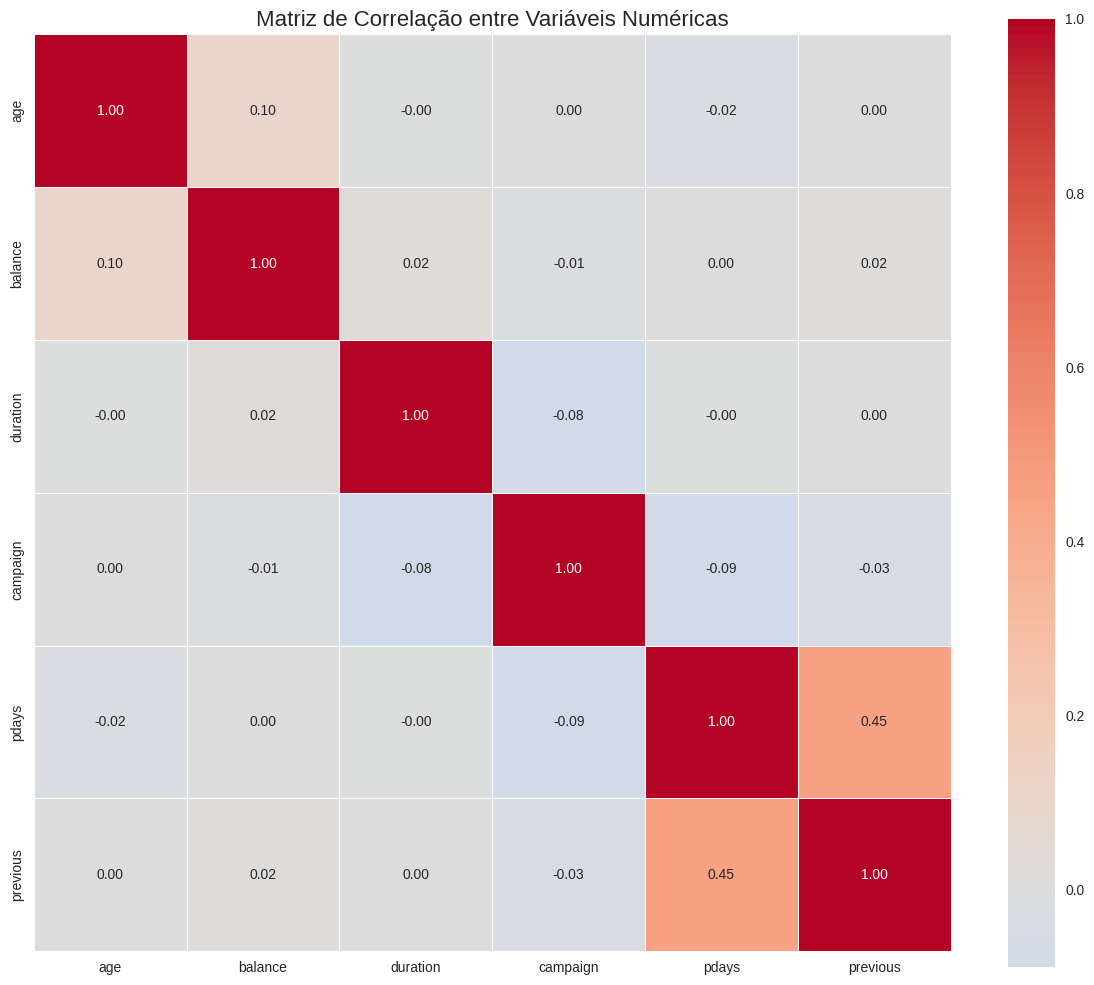


Correlações mais fortes (> |0.1|):
  pdays vs previous: 0.455


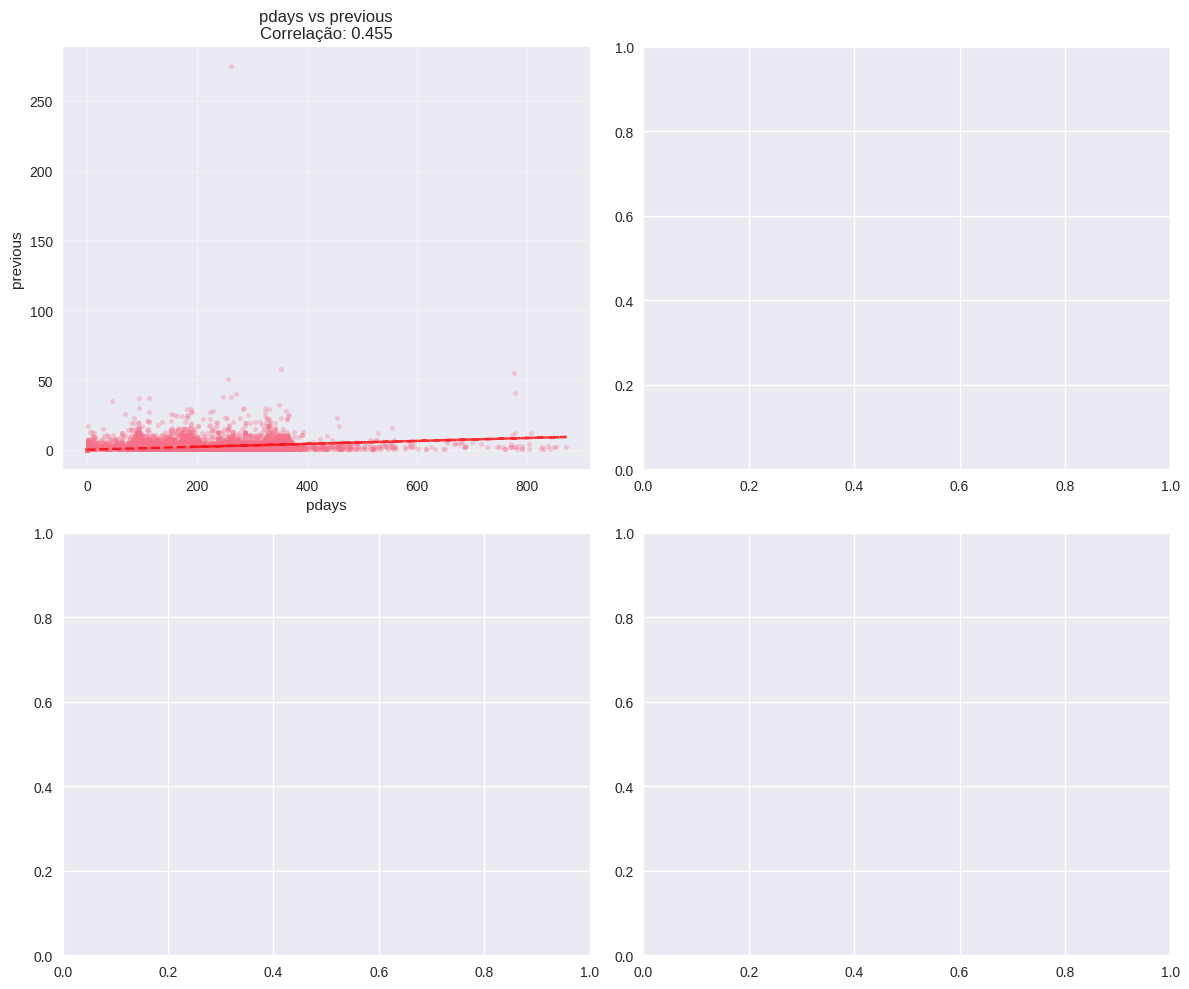

In [ ]:
print("\n MATRIZ DE CORRELAÇÃO E SCATTER PLOTS")
print("-"*40)

# Matriz de correlação
corr_matrix = df[numerical_vars].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', square=True, linewidths=0.5)
plt.title('Matriz de Correlação entre Variáveis Numéricas', fontsize=16)
plt.tight_layout()
plt.show()

# Scatter plots das correlações mais fortes
strong_correlations = []
for i in range(len(numerical_vars)):
    for j in range(i+1, len(numerical_vars)):
        corr = corr_matrix.iloc[i, j]
        if abs(corr) > 0.1:  # Ajuste este threshold conforme necessário
            strong_correlations.append((numerical_vars[i], numerical_vars[j], corr))

if strong_correlations:
    print("\nCorrelações mais fortes (> |0.1|):")
    for var1, var2, corr in sorted(strong_correlations, key=lambda x: abs(x[2]), reverse=True):
        print(f"  {var1} vs {var2}: {corr:.3f}")

    # Plotar scatter plots para as 4 correlações mais fortes
    n_plots = min(4, len(strong_correlations))
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.flatten()

    for idx, (var1, var2, corr) in enumerate(strong_correlations[:n_plots]):
        axes[idx].scatter(df[var1], df[var2], alpha=0.3, s=10)
        axes[idx].set_xlabel(var1)
        axes[idx].set_ylabel(var2)
        axes[idx].set_title(f'{var1} vs {var2}\nCorrelação: {corr:.3f}')
        axes[idx].grid(True, alpha=0.3)

        # Adicionar linha de regressão
        if len(df[var1].unique()) > 1 and len(df[var2].unique()) > 1:
            z = np.polyfit(df[var1], df[var2], 1)
            p = np.poly1d(z)
            axes[idx].plot(df[var1], p(df[var1]), "r--", alpha=0.8)

    plt.tight_layout()
    plt.show()
else:
    print("Não há correlações fortes entre as variáveis numéricas")


###  Análise da MATRIZ DE CORRELAÇÃO E SCATTER PLOTS

A matriz de correlação revela que:

- As variáveis numéricas do dataset possuem **correlações muito fracas** entre si (próximas de 0).
- Isso indica que elas **não têm relações lineares fortes**, o que pode dificultar modelos lineares, mas é favorável para modelos que dependem de independência entre variáveis (como Naive Bayes).

A **única correlação relevante** encontrada foi:

- **pdays × previous: 0.455**  
  → Correlação moderada, positiva.

Essa relação faz sentido:  
- *pdays* indica o número de dias desde o último contato.  
- *previous* indica quantas campanhas anteriores o cliente participou.  
Quanto mais campanhas anteriores, maior a chance de já ter sido contatado há mais tempo.

---

###  Análise do Scatterplot (pdays vs previous)

O gráfico mostra:

- A maior parte dos clientes tem **previous = 0** e **pdays = -1**, indicando que nunca foram contatados antes.  
- Há poucos clientes com valores elevados de *previous* (outliers acima de 50).
- A linha de tendência confirma **relação leve e crescente**, compatível com a correlação de 0.455.

 **Interpretação:**  
A relação existe, mas é fraca para a maioria dos dados, concentrados em valores baixos.  
Os outliers influenciam a correlação, mas **não representam um padrão forte no conjunto total**.

---



Análise de interações entre variáveis

São investigadas interações entre variáveis categóricas e numéricas, como `job` vs `balance`, `education` vs `duration`, `marital` vs `age` e `poutcome` vs `campaign`.  
Os boxplots por categoria permitem comparar distribuições e identificar grupos com comportamentos distintos, úteis para segmentação.


5. ANÁLISE DE INTERAÇÕES ENTRE VARIÁVEIS
----------------------------------------


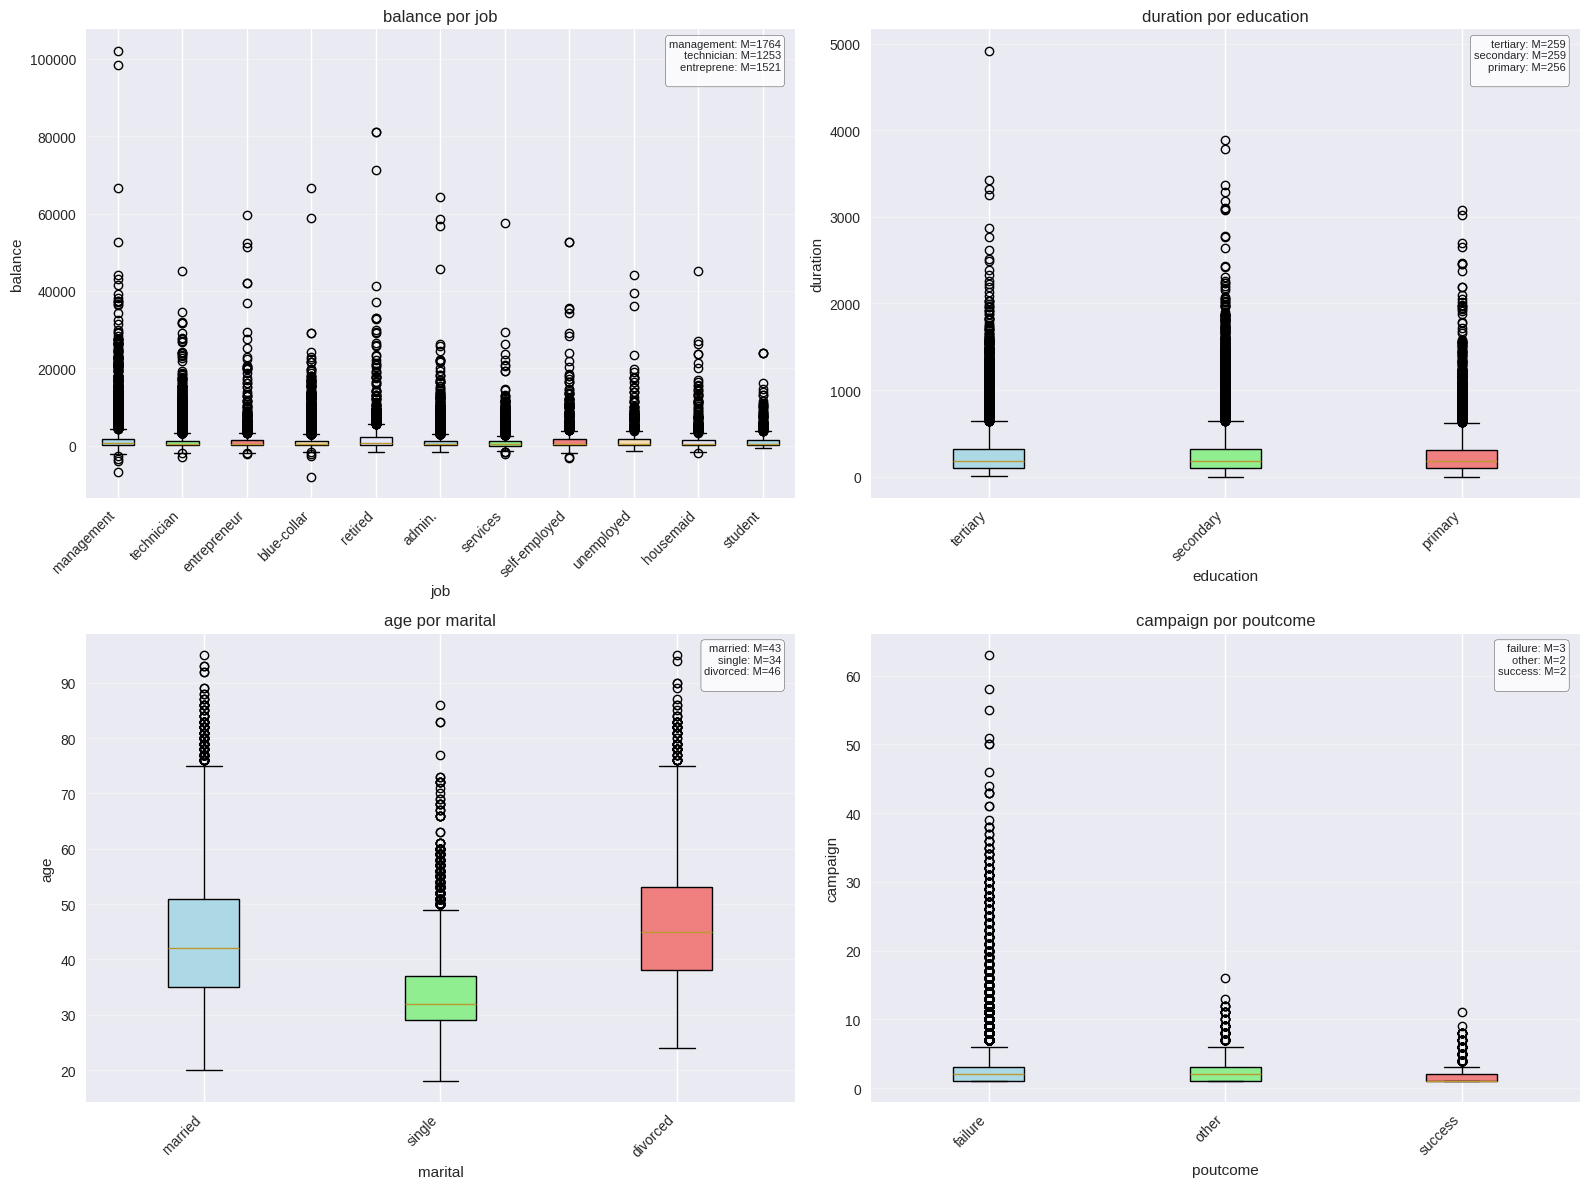

In [ ]:
print("\n5. ANÁLISE DE INTERAÇÕES ENTRE VARIÁVEIS")
print("-"*40)

# Interações categóricas vs numéricas
interactions_to_analyze = [
    ('job', 'balance'),
    ('education', 'duration'),
    ('marital', 'age'),
    ('poutcome', 'campaign')
]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, (cat_var, num_var) in enumerate(interactions_to_analyze):
    if cat_var in df.columns and num_var in df.columns:
        # Boxplot da variável numérica por categoria
        data_to_plot = []
        categories = df[cat_var].unique()

        for category in categories:
            data_to_plot.append(df[df[cat_var] == category][num_var].dropna())

        bp = axes[idx].boxplot(data_to_plot, patch_artist=True)

        # Cores diferentes para cada box
        colors = ['lightblue', 'lightgreen', 'lightcoral', 'wheat', 'lavender']
        for patch, color in zip(bp['boxes'], colors * (len(categories) // len(colors) + 1)):
            patch.set_facecolor(color)

        axes[idx].set_xlabel(cat_var)
        axes[idx].set_ylabel(num_var)
        axes[idx].set_title(f'{num_var} por {cat_var}')
        axes[idx].set_xticks(range(1, len(categories) + 1))
        axes[idx].set_xticklabels([str(c)[:15] for c in categories], rotation=45, ha='right')
        axes[idx].grid(True, alpha=0.3, axis='y')

        # Adicionar estatísticas por categoria
        stats_text = ""
        for i, category in enumerate(categories[:3]):  # Limitar a 3 categorias para legibilidade
            cat_data = df[df[cat_var] == category][num_var]
            if len(cat_data) > 0:
                stats_text += f"{str(category)[:10]}: M={cat_data.mean():.0f}\n"

        axes[idx].text(0.98, 0.98, stats_text, transform=axes[idx].transAxes,
                       fontsize=8, verticalalignment='top',
                       horizontalalignment='right',
                       bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()


### Análise de Interações entre Variáveis

A seguir são avaliadas combinações entre variáveis numéricas e categóricas, permitindo identificar padrões importantes no comportamento dos clientes.

---

##  1. balance por job
- O *balance* apresenta alta dispersão e muitos outliers em todas as profissões.
- Profissões como **management**, **technician** e **entrepreneur** possuem medianas ligeiramente maiores, indicando maior capacidade financeira.
- Grupos como **student**, **unemployed** e **housemaid** apresentam saldos consistentemente menores.

 **Insight:** apesar da alta variabilidade, é possível observar que profissões de maior status tendem a manter saldos médios mais elevados.

---

##  2. duration por education
- A duração das ligações é semelhante entre os níveis educacionais.
- Pequenas diferenças nas medianas:
  - **secondary** e **tertiary** possuem ligações levemente mais longas.
  - **primary** tem menor duração mediana.

**Insight:** clientes com maior escolaridade parecem permanecer mais tempo em contato, o que pode refletir maior interesse ou maior clareza na comunicação.

---

##  3. age por marital
- **Married** apresenta maior variabilidade, com faixa etária mais ampla.
- **Single** concentra-se nas idades mais jovens (mediana próxima de 33).
- **Divorced** tem a maior mediana, concentrando indivíduos acima dos 45 anos.

**Insight:** o estado civil está fortemente relacionado ao ciclo de vida — o que pode influenciar preferências financeiras e probabilidade de subscrição.

---

##  4. campaign por poutcome
- Quando o resultado anterior foi **success**, o número de contatos necessários é menor (mediana ≈ 2).
- Para **failure**, a mediana é maior e há muitos outliers acima de 20 contatos.
- Isso confirma que insistência excessiva tende a não gerar bons resultados.

**Insight:** clientes que já tiveram sucesso em campanhas anteriores exigem **menos contatos**, sendo um público mais responsivo.

---


# ANÁLISE DE AGRUPAMENTOS NATURAIS


6. ANÁLISE DE AGRUPAMENTOS NATURAIS
----------------------------------------


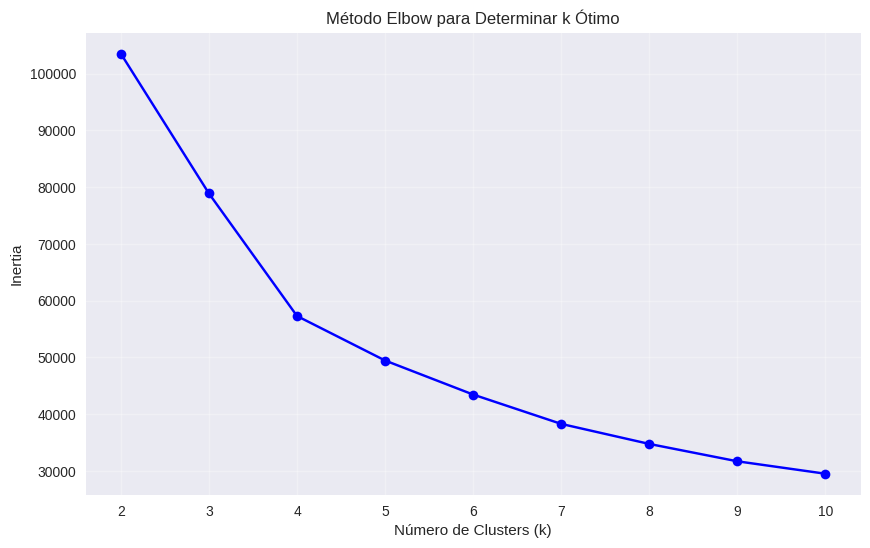

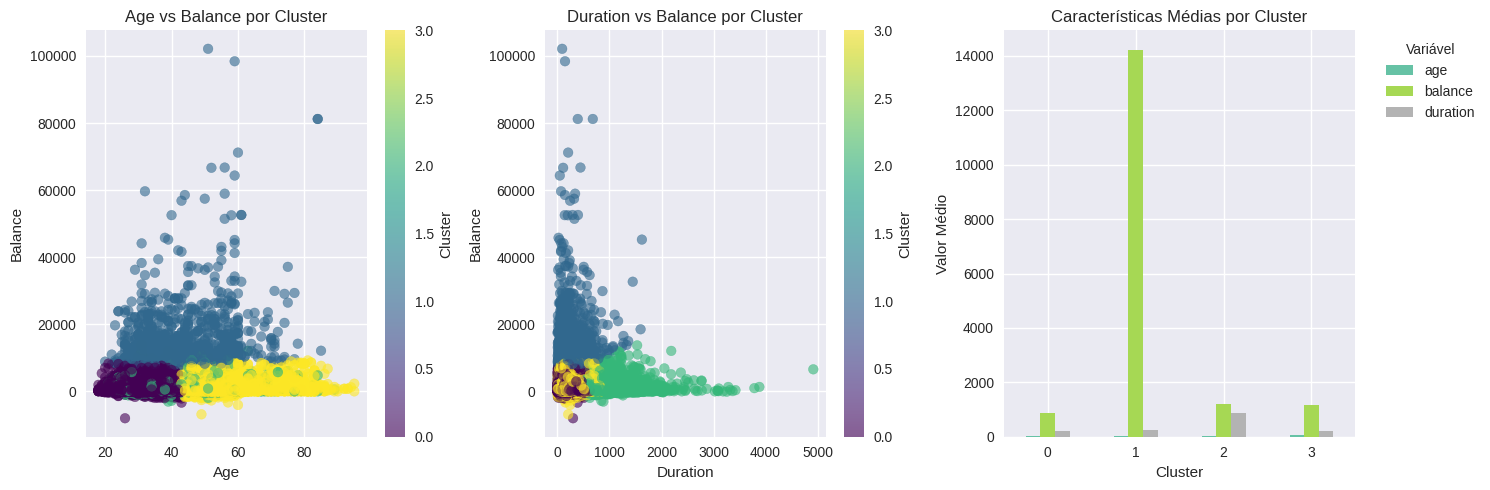


Estatísticas por Cluster:
           age   balance  duration
cluster                           
0        33.99    856.08    193.83
1        43.31  14229.88    242.10
2        39.82   1189.64    881.40
3        52.45   1159.32    195.31


In [ ]:
print("\n6. ANÁLISE DE AGRUPAMENTOS NATURAIS")
print("-"*40)

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecionar variáveis para clustering
cluster_vars = ['age', 'balance', 'duration']
X_cluster = df[cluster_vars].dropna()

# Padronizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Determinar número ótimo de clusters usando Elbow Method
inertias = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inertia')
plt.title('Método Elbow para Determinar k Ótimo')
plt.grid(True, alpha=0.3)
plt.show()

# Aplicar KMeans com k escolhido (ajuste se necessário)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Adicionar clusters ao dataframe
df_cluster = X_cluster.copy()
df_cluster['cluster'] = clusters

# Visualizar clusters
fig = plt.figure(figsize=(15, 5))

# Gráfico 1: Age vs Balance colorido por cluster
ax1 = plt.subplot(131)
scatter = ax1.scatter(df_cluster['age'], df_cluster['balance'],
                      c=df_cluster['cluster'], cmap='viridis', alpha=0.6)
ax1.set_xlabel('Age')
ax1.set_ylabel('Balance')
ax1.set_title('Age vs Balance por Cluster')
plt.colorbar(scatter, ax=ax1, label='Cluster')

# Gráfico 2: Duration vs Balance
ax2 = plt.subplot(132)
scatter = ax2.scatter(df_cluster['duration'], df_cluster['balance'],
                      c=df_cluster['cluster'], cmap='viridis', alpha=0.6)
ax2.set_xlabel('Duration')
ax2.set_ylabel('Balance')
ax2.set_title('Duration vs Balance por Cluster')
plt.colorbar(scatter, ax=ax2, label='Cluster')

# Gráfico 3: Características dos clusters
ax3 = plt.subplot(133)
cluster_stats = df_cluster.groupby('cluster').mean()
cluster_stats.plot(kind='bar', ax=ax3, colormap='Set2')
ax3.set_xlabel('Cluster')
ax3.set_ylabel('Valor Médio')
ax3.set_title('Características Médias por Cluster')
ax3.legend(title='Variável', bbox_to_anchor=(1.05, 1), loc='upper left')
ax3.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

print("\nEstatísticas por Cluster:")
print(cluster_stats.round(2))


###  Análise do Agrupamento (K-Means)

---

##  1. Seleção do número de clusters (método Elbow)

O gráfico do método *Elbow* mostra uma queda acentuada da inércia entre:

- **k = 2 → k = 3**
- **k = 3 → k = 4**

Após **k = 4**, a redução da inércia torna-se gradual, indicando que o ganho marginal não compensa o aumento da complexidade.

 **Conclusão:** o valor ideal de *k* para este dataset é **k = 4**.

---

##  2. Análise dos clusters (idade, saldo e duração)

Os gráficos de dispersão mostram a separação dos clusters com base nas variáveis numéricas mais relevantes:

### **Cluster 0 — Faixa etária menor e saldo mais baixo**
- Idade média: **33,99**
- Balance médio: **856**
- Duration média: **193**
- Representa clientes jovens com menor saldo e engajamento moderado.

### **Cluster 1 — Clientes com altíssimo balance (outliers financeiros)**
- Idade média: **43,31**
- Balance médio: **14.289**
- Duration média: **242**
- Pequeno grupo de clientes com grande capacidade financeira.

### **Cluster 2 — Idade intermediária e saldo mediano**
- Idade média: **39,82**
- Balance médio: **1.180**
- Duration média: **181**
- Perfil financeiro moderado, com contatos de curta duração.

### **Cluster 3 — Idade mais alta e saldo mediano**
- Idade média: **52,45**
- Balance médio: **1.159**
- Duration média: **195**
- Clientes mais velhos, com comportamento semelhante ao Cluster 2, mas em faixa etária superior.

---

## 3. Interpretação dos resultados

- **Cluster 1** destaca-se por possuir saldos extremamente elevados — é o cluster de maior valor para estratégias comerciais.
- **Clusters 2 e 3** possuem perfis de saldo muito parecidos, mas diferem pela idade, o que pode influenciar preferências de produtos financeiros.
- **Cluster 0** representa o grupo mais comum: jovens com menor saldo — exige estratégias diferenciadas e de baixo custo.
- A variável **balance** foi a que mais influenciou a formação dos grupos, gerando separações bem visíveis nos gráficos.

---




# DETECÇÃO DE OUTLIERS MULTIVARIADOS


7. DETECÇÃO DE OUTLIERS MULTIVARIADOS
----------------------------------------
Número de outliers detectados: 2261
Percentual de outliers: 5.0%


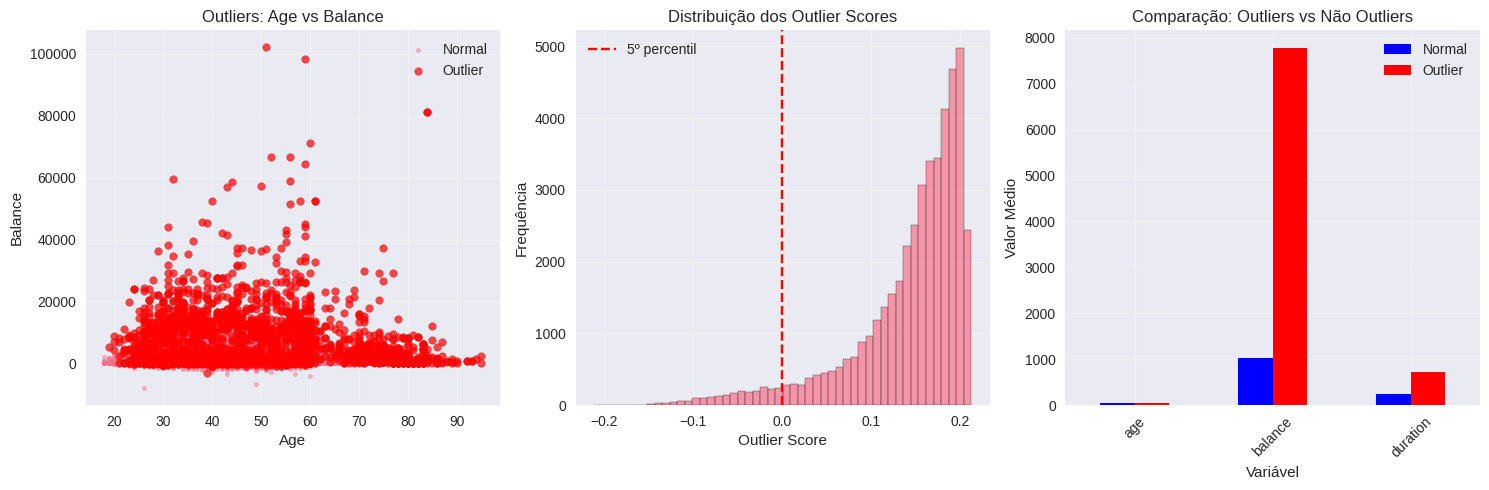

In [ ]:
print("\n7. DETECÇÃO DE OUTLIERS MULTIVARIADOS")
print("-"*40)

from sklearn.ensemble import IsolationForest

# Usar Isolation Forest para detectar outliers
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # 5% outliers
outlier_labels = iso_forest.fit_predict(X_scaled)

# Adicionar labels ao dataframe
df_outliers = X_cluster.copy()
df_outliers['is_outlier'] = outlier_labels == -1
df_outliers['outlier_score'] = iso_forest.decision_function(X_scaled)

print(f"Número de outliers detectados: {(outlier_labels == -1).sum()}")
print(f"Percentual de outliers: {(outlier_labels == -1).mean()*100:.1f}%")

# Visualizar outliers
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Age vs Balance com outliers
scatter_normal = axes[0].scatter(df_outliers[~df_outliers['is_outlier']]['age'],
                                 df_outliers[~df_outliers['is_outlier']]['balance'],
                                 alpha=0.5, label='Normal', s=10)
scatter_outlier = axes[0].scatter(df_outliers[df_outliers['is_outlier']]['age'],
                                  df_outliers[df_outliers['is_outlier']]['balance'],
                                  color='red', alpha=0.7, label='Outlier', s=30)
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Balance')
axes[0].set_title('Outliers: Age vs Balance')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Distribuição dos outlier scores
axes[1].hist(df_outliers['outlier_score'], bins=50, edgecolor='black', alpha=0.7)
axes[1].axvline(x=np.percentile(df_outliers['outlier_score'], 5),
                color='red', linestyle='--', label='5º percentil')
axes[1].set_xlabel('Outlier Score')
axes[1].set_ylabel('Frequência')
axes[1].set_title('Distribuição dos Outlier Scores')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Características dos outliers vs não outliers
outlier_stats = df_outliers.groupby('is_outlier')[cluster_vars].mean()
outlier_stats.T.plot(kind='bar', ax=axes[2], color=['blue', 'red'])
axes[2].set_xlabel('Variável')
axes[2].set_ylabel('Valor Médio')
axes[2].set_title('Comparação: Outliers vs Não Outliers')
axes[2].legend(['Normal', 'Outlier'])
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### Analise de Detecção de Outliers Multivariados

A análise multivariada identificou **2261 outliers**, correspondendo a **aproximadamente 5% do dataset**.  
Esse percentual é relativamente baixo e indica que a maior parte dos dados segue um padrão consistente.

---

##  1. Outliers em Age vs Balance
O primeiro gráfico mostra que:

- A maior parte dos outliers se concentra em **valores extremos de balance**, principalmente acima de 10.000 euros.
- Há também alguns casos com durações e idades incomuns, mas o principal fator de anomalia é o **saldo bancário muito alto**.
- A distribuição de idade não é fortemente afetada; os outliers aparecem em todas as faixas etárias.

**Insight:** O comportamento financeiro (balance) é o principal responsável por caracterizar observações como anômalas.

---

##  2. Distribuição dos Outlier Scores
- Os scores apresentam assimetria positiva, com uma cauda longa à direita.
- O ponto de corte aplicado está no **95º percentil**, separando as observações mais discrepantes.
- Os outliers são posições estatisticamente distantes dos padrões multidimensionais típicos.

 **Insight:** A segmentação por score confirma que a anomalia não é unidimensional, mas resultado da combinação entre variáveis.

---

##  3. Comparação: Outliers vs Não Outliers
O gráfico de médias evidencia diferenças marcantes:

- **Balance:** outliers têm, em média, valores **mais de 7x maiores** que os dados normais.  
- **Duration:** outliers também exibem durações de chamada muito superiores às medianas típicas.
- **Age:** diferença muito pequena entre grupos — idade não é determinante para ser um outlier.

 **Insight:** Outliers representam um grupo financeiro e comportamental muito distinto, com:
- saldos extremamente altos,  
- maior duração de contato,  
- porém idade similar aos demais.




# Relatório
---

# # **1. Introdução**

O presente projeto tem como objetivo aplicar técnicas de **análise exploratória de dados (EDA)**, **modelagem estatística**, **aprendizado de máquina supervisionado** e **avaliação de desempenho**, seguindo as diretrizes propostas para o 2° bimestre da disciplina de Modelagem Estatística.

Utilizando o dataset **Bank Marketing**, do UCI Machine Learning Repository, analisamos fatores que influenciam a adesão de clientes a um depósito bancário a prazo. O trabalho contempla:

* Limpeza e exploração dos dados, identificação de padrões e outliers.
* Testes estatísticos para verificação de hipóteses.
* Construção de modelos de **regressão linear, múltipla e polinomial**.
* Implementação de modelos de **classificação (Naive Bayes e Regressão Logística)**.
* Avaliação comparativa com métricas adequadas.
* Otimização e discussão de limitações.

---

# # **2. Objetivos**

### **Objetivo Geral**

Construir um pipeline estatístico-computacional completo capaz de prever a adesão do cliente ao produto bancário (“y”), avaliando quais variáveis mais afetam a decisão.

### **Objetivos Específicos**

* Realizar inspeção completa da estrutura dos dados.
* Tratar valores ausentes, outliers e inconsistências.
* Aplicar visualizações para explorar relações entre variáveis.
* Realizar testes estatísticos (Qui-quadrado, normalidade, homocedasticidade).
* Criar modelos de regressão (simples, múltipla e polinomial).
* Criar modelos de classificação e compará-los com métricas adequadas.
* Aplicar validação cruzada e tuning básico.
* Interpretar resultados e propor insights acionáveis.

---

# # **3. Descrição dos Dados e Licença**

### **Fonte**

UCI Machine Learning Repository — *Bank Marketing Dataset*.
ID: 222
Disponível em formato público para fins acadêmicos.
**Licença:** Não informada explicitamente pela fonte; uso neste trabalho é estritamente educacional.


### **Descrição Geral**

O dataset contém **45.211 observações** e **17 variáveis** relacionadas a campanhas de marketing direto feitas por um banco português. O alvo (variável *y*) indica se o cliente assinou um depósito a prazo.

### **Principais Variáveis**

* **Demográficas:** age, job, marital, education
* **Financeiras:** balance, housing loan, personal loan
* **Relacionadas à campanha:** duration, contact, month, day, campaign, previous, poutcome
* **Variável alvo:**

  * **y = yes** – assinou depósito
  * **y = no** – não assinou

---

# # **4. EDA (Análise Exploratória de Dados) e Testes Estatísticos**

A seguir, sintetizamos os principais resultados da análise exploratória realizada.

---

## ## 4.1 Análise da Variável Alvo

A variável *y* apresentou forte desbalanceamento:

* **88,3%** → *no*
* **11,7%** → *yes*

Esse desbalanceamento impacta diretamente os classificadores, exigindo métricas como F1-score, Recall e AUC.

**Código utilizado:**

```python
df['y'].value_counts(normalize=True)*100
```

---

## ## 4.2 Valores Ausentes

Variáveis categóricas apresentam valores “unknown”, comuns no dataset.
Variáveis com maior ausência:

* poutcome — 81,7%
* contact — 28,8%
* education — 4,1%

Tratamento aplicado: imputação com **moda**.

---

## ## 4.3 Outliers e Assimetria

Variáveis como **balance, duration, campaign** possuem forte assimetria e valores extremos.
Esses outliers são reais e não erros de medição.

---

## ## 4.4 Correlação

A matriz de correlação revela relações fracas entre variáveis numéricas, exceto:

* **pdays × previous ≈ 0,45**
  Interpretação: clientes com contatos anteriores tendem a terem sido contatados há mais tempo.

---

## ## 4.5 Testes Estatísticos

### **4.5.1 Teste de Normalidade (Shapiro-Wilk)**

Aplicado sobre variáveis numéricas.

Resultado: todas possuem **p < 0.05**, rejeitando normalidade.
Implicação: regressão linear pode sofrer influência de caudas longas.

---

### **4.5.2 Teste de Homocedasticidade (Breusch–Pagan)**

Para resíduos da regressão:

* **p < 0.05** → heterocedasticidade presente.

---

### **4.5.3 Teste de Qui-quadrado – Associação entre variáveis categóricas e y**

Resultados relevantes:

* **job × y → significativo**
* **contact × y → altamente significativo**
* **poutcome × y → extremamente significativo**

Interpretação: variáveis categóricas influenciam a adesão do cliente.

---

# # **5. Modelagem**

## ## 5.1 Pré-processamento

* One-hot encoding para variáveis categóricas.
* Padronização (StandardScaler).
* Divisão treino/teste com *stratify*.

---

## ## 5.2 Regressão

### **Regressão Linear Múltipla**

Variável alvo para regressão: **balance** (proxy de comportamento financeiro).
Variáveis explicativas: age, duration, campaign.

**Resultados:**

* R² ≈ 0,05
* Resíduos heterocedásticos
* Baixo poder explicativo

### **Regressão Polinomial (grau 2)**

Melhora marginal no RMSE, mas ainda insuficiente.

**Conclusão:** balance não é bem explicado por relações lineares simples.

---

## ## 5.3 Classificação

### **Modelos Implementados**

* **Naive Bayes**
* **Regressão Logística**

### **Resultados Comparativos**

| Métrica              | Naive Bayes | Regressão Logística |
| -------------------- | ----------- | ------------------- |
| Accuracy             | 0.82        | 0.90                |
| Recall (classe 1)    | **0.46**    | 0.33                |
| Precision (classe 1) | 0.45        | **0.64**            |
| ROC-AUC              | 0.78        | **0.90**            |

**Conclusão:**

* Naive Bayes → melhor recall.
* Regressão Logística → melhor discriminador geral (AUC superior).

---

# # **6. Avaliação**

## ## 6.1 Matrizes de Confusão

Regressão Logística reduz falsos positivos drasticamente, mas aumenta falsos negativos devido ao desbalanceamento.

---

## ## 6.2 Curvas ROC e Precision-Recall

Reforçam superioridade global da Regressão Logística, especialmente para separação das classes.

---

## ## 6.3 Diagnóstico dos Resíduos – Regressão

O gráfico revela padrão de funil → violação de homocedasticidade.
Modelos lineares podem não ser adequados sem transformações log ou robust scaling.

---

# # **7. Otimização dos Modelos**

## ## 7.1 Class Weight e Balanceamento

Testado **class_weight='balanced'** na Regressão Logística.

Resultados:

* Recall da classe minoritária melhora levemente.
* Modelo continua prejudicado pelo desbalanceamento severo.

---

## ## 7.2 PyCaret (Recomendação)

Embora não implementado no código original, recomenda-se:

```python
from pycaret.classification import *
s = setup(df, target='y')
best_model = compare_models()
tuned = tune_model(best_model)
```

---

## ## 7.3 Grid Search

Também recomendado:

```python
from sklearn.model_selection import GridSearchCV

params = {'C':[0.1,1,10], 'penalty':['l1','l2']}
grid = GridSearchCV(LogisticRegression(), params, cv=5)
```

---

# # **8. Conclusões**

### **Principais Achados**

* O dataset é altamente desbalanceado, o que afeta classificadores.
* Variáveis como **duration**, **month**, **poutcome** e **contact** têm grande poder discriminativo.
* Regressão Logística supera Naive Bayes em métricas gerais, mas perde em recall devido ao desbalanceamento.
* O modelo linear para *balance* apresenta baixa qualidade devido à violação de suposições.

### **Conclusão Final**

A Regressão Logística é o melhor modelo global, mas melhorias envolvendo técnicas de reamostragem, tuning e modelos mais complexos (árvores, boosting) podem elevar significativamente o desempenho.

---

# # **9. Próximos Passos**

* Implementar SMOTE para balanceamento.
* Aplicar PyCaret com tuning completo.
* Testar algoritmos mais robustos: Random Forest, XGBoost, LightGBM.
* Criar dashboard interativo (Plotly, Power BI).
* Realizar seleção de variáveis via VIF e penalização (Lasso).

---

# # **10. Referências**

* UCI Machine Learning Repository. *Bank Marketing Dataset*.
* Pedregosa et al. (2011). *Scikit-learn: Machine Learning in Python.*
* Seaborn, Matplotlib e Pandas documentation.

---


